## **GROUP 4**
- Lorenza Di Mauro
- Raffaele Sannino
- Maria Zampella  

## **DATASET AND MAIN GOAL**
In this notebook we have to deal with a multidimensional time series dataset concerning the concentrations of some pollutants in a significant polluted area, in an Italian city. The dataset is available on https://archive.ics.uci.edu/ml/datasets/air+quality. Quoting the description of the dataset: *The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses.*

**Our goal basically is to make predictions aboout the concentration of CO by using LSTM and Bidirectional-LSTM.**

Let's start by loading and taking a look at the dataset.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#MARIELLA PATH
dataset_path = r'/content/drive/MyDrive/lstm_ds/AirQualityUCI/AirQualityUCI.xlsx'
dataset = pd.read_excel(dataset_path)
dataset

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0    2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1    2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2    2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3    2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4    2004-03-10  22:00:00     1.6      1272.25        51   6.518224   
...         ...       ...     ...          ...       ...        ...   
9352 2005-04-04  10:00:00     3.1      1314.25      -200  13.529605   
9353 2005-04-04  11:00:00     2.4      1162.50      -200  11.355157   
9354 2005-04-04  12:00:00     2.4      1142.00      -200  12.374538   
9355 2005-04-04  13:00:00     2.1      1002.50      -200   9.547187   
9356 2005-04-04  14:00:00     2.2      1070.75      -200  11.932060   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0           1045.50    166.0       1056.25    113.0       1692.00   
1            954.75    103.0       1173.75     92.0       1558.75   
2            939.25    131.0       1140.00    114.0       1554.50   
3            948.25    172.0       1092.00    122.0       1583.75   
4            835.50    131.0       1205.00    116.0       1490.00   
...             ...      ...           ...      ...           ...   
9352        1101.25    471.7        538.50    189.8       1374.25   
9353        1027.00    353.3        603.75    179.2       1263.50   
9354        1062.50    293.0        603.25    174.7       1240.75   
9355         960.50    234.5        701.50    155.7       1041.00   
9356        1047.25    265.2        654.00    167.7       1128.50   

      PT08.S5(O3)       T         RH        AH  
0         1267.50  13.600  48.875001  0.757754  
1          972.25  13.300  47.700000  0.725487  
2         1074.00  11.900  53.975000  0.750239  
3         1203.25  11.000  60.000000  0.786713  
4         1110.00  11.150  59.575001  0.788794  
...           ...     ...        ...       ...  
9352      1728.50  21.850  29.250000  0.756824  
9353      1269.00  24.325  23.725000  0.711864  
9354      1092.00  26.900  18.350000  0.640649  
9355       769.75  28.325  13.550000  0.513866  
9356       816.00  28.500  13.125000  0.502804  

[9357 rows x 15 columns]

In [ ]:
# dataset_path = r'/content/drive/MyDrive/AirQualityUCI/AirQualityUCI.xlsx'
# dataset = pd.read_excel(dataset_path)
# dataset

In [ ]:
dataset.describe(include = 'all')

<ipython-input-5-a7fe9e1cc73d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dataset.describe(include = 'all')


Date      Time       CO(GT)  PT08.S1(CO)     NMHC(GT)  \
count                  9357      9357  9357.000000  9357.000000  9357.000000   
unique                  391        24          NaN          NaN          NaN   
top     2004-09-21 00:00:00  18:00:00          NaN          NaN          NaN   
freq                     24       390          NaN          NaN          NaN   
first   2004-03-10 00:00:00       NaN          NaN          NaN          NaN   
last    2005-04-04 00:00:00       NaN          NaN          NaN          NaN   
mean                    NaN       NaN   -34.207524  1048.869652  -159.090093   
std                     NaN       NaN    77.657170   329.817015   139.789093   
min                     NaN       NaN  -200.000000  -200.000000  -200.000000   
25%                     NaN       NaN     0.600000   921.000000  -200.000000   
50%                     NaN       NaN     1.500000  1052.500000  -200.000000   
75%                     NaN       NaN     2.600000  1221.250000  -200.000000   
max                     NaN       NaN    11.900000  2039.750000  1189.000000   

           C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  PT08.S3(NOx)      NO2(GT)  \
count   9357.000000    9357.000000  9357.000000   9357.000000  9357.000000   
unique          NaN            NaN          NaN           NaN          NaN   
top             NaN            NaN          NaN           NaN          NaN   
freq            NaN            NaN          NaN           NaN          NaN   
first           NaN            NaN          NaN           NaN          NaN   
last            NaN            NaN          NaN           NaN          NaN   
mean       1.865576     894.475963   168.604200    794.872333    58.135898   
std       41.380154     342.315902   257.424561    321.977031   126.931428   
min     -200.000000    -200.000000  -200.000000   -200.000000  -200.000000   
25%        4.004958     711.000000    50.000000    637.000000    53.000000   
50%        7.886653     894.500000   141.000000    794.250000    96.000000   
75%       13.636091    1104.750000   284.200000    960.250000   133.000000   
max       63.741476    2214.000000  1479.000000   2682.750000   339.700000   

        PT08.S4(NO2)  PT08.S5(O3)            T           RH           AH  
count    9357.000000  9357.000000  9357.000000  9357.000000  9357.000000  
unique           NaN          NaN          NaN          NaN          NaN  
top              NaN          NaN          NaN          NaN          NaN  
freq             NaN          NaN          NaN          NaN          NaN  
first            NaN          NaN          NaN          NaN          NaN  
last             NaN          NaN          NaN          NaN          NaN  
mean     1391.363266   974.951534     9.776600    39.483611    -6.837604  
std       467.192382   456.922728    43.203438    51.215645    38.976670  
min      -200.000000  -200.000000  -200.000000  -200.000000  -200.000000  
25%      1184.750000   699.750000    10.950000    34.050000     0.692275  
50%      1445.500000   942.000000    17.200000    48.550000     0.976823  
75%      1662.000000  1255.250000    24.075000    61.875000     1.296223  
max      2775.000000  2522.750000    44.600000    88.725000     2.231036

We plot all the features of the dataset (that we use as predictors) vs the Time for observing if there are some noticeable patterns.

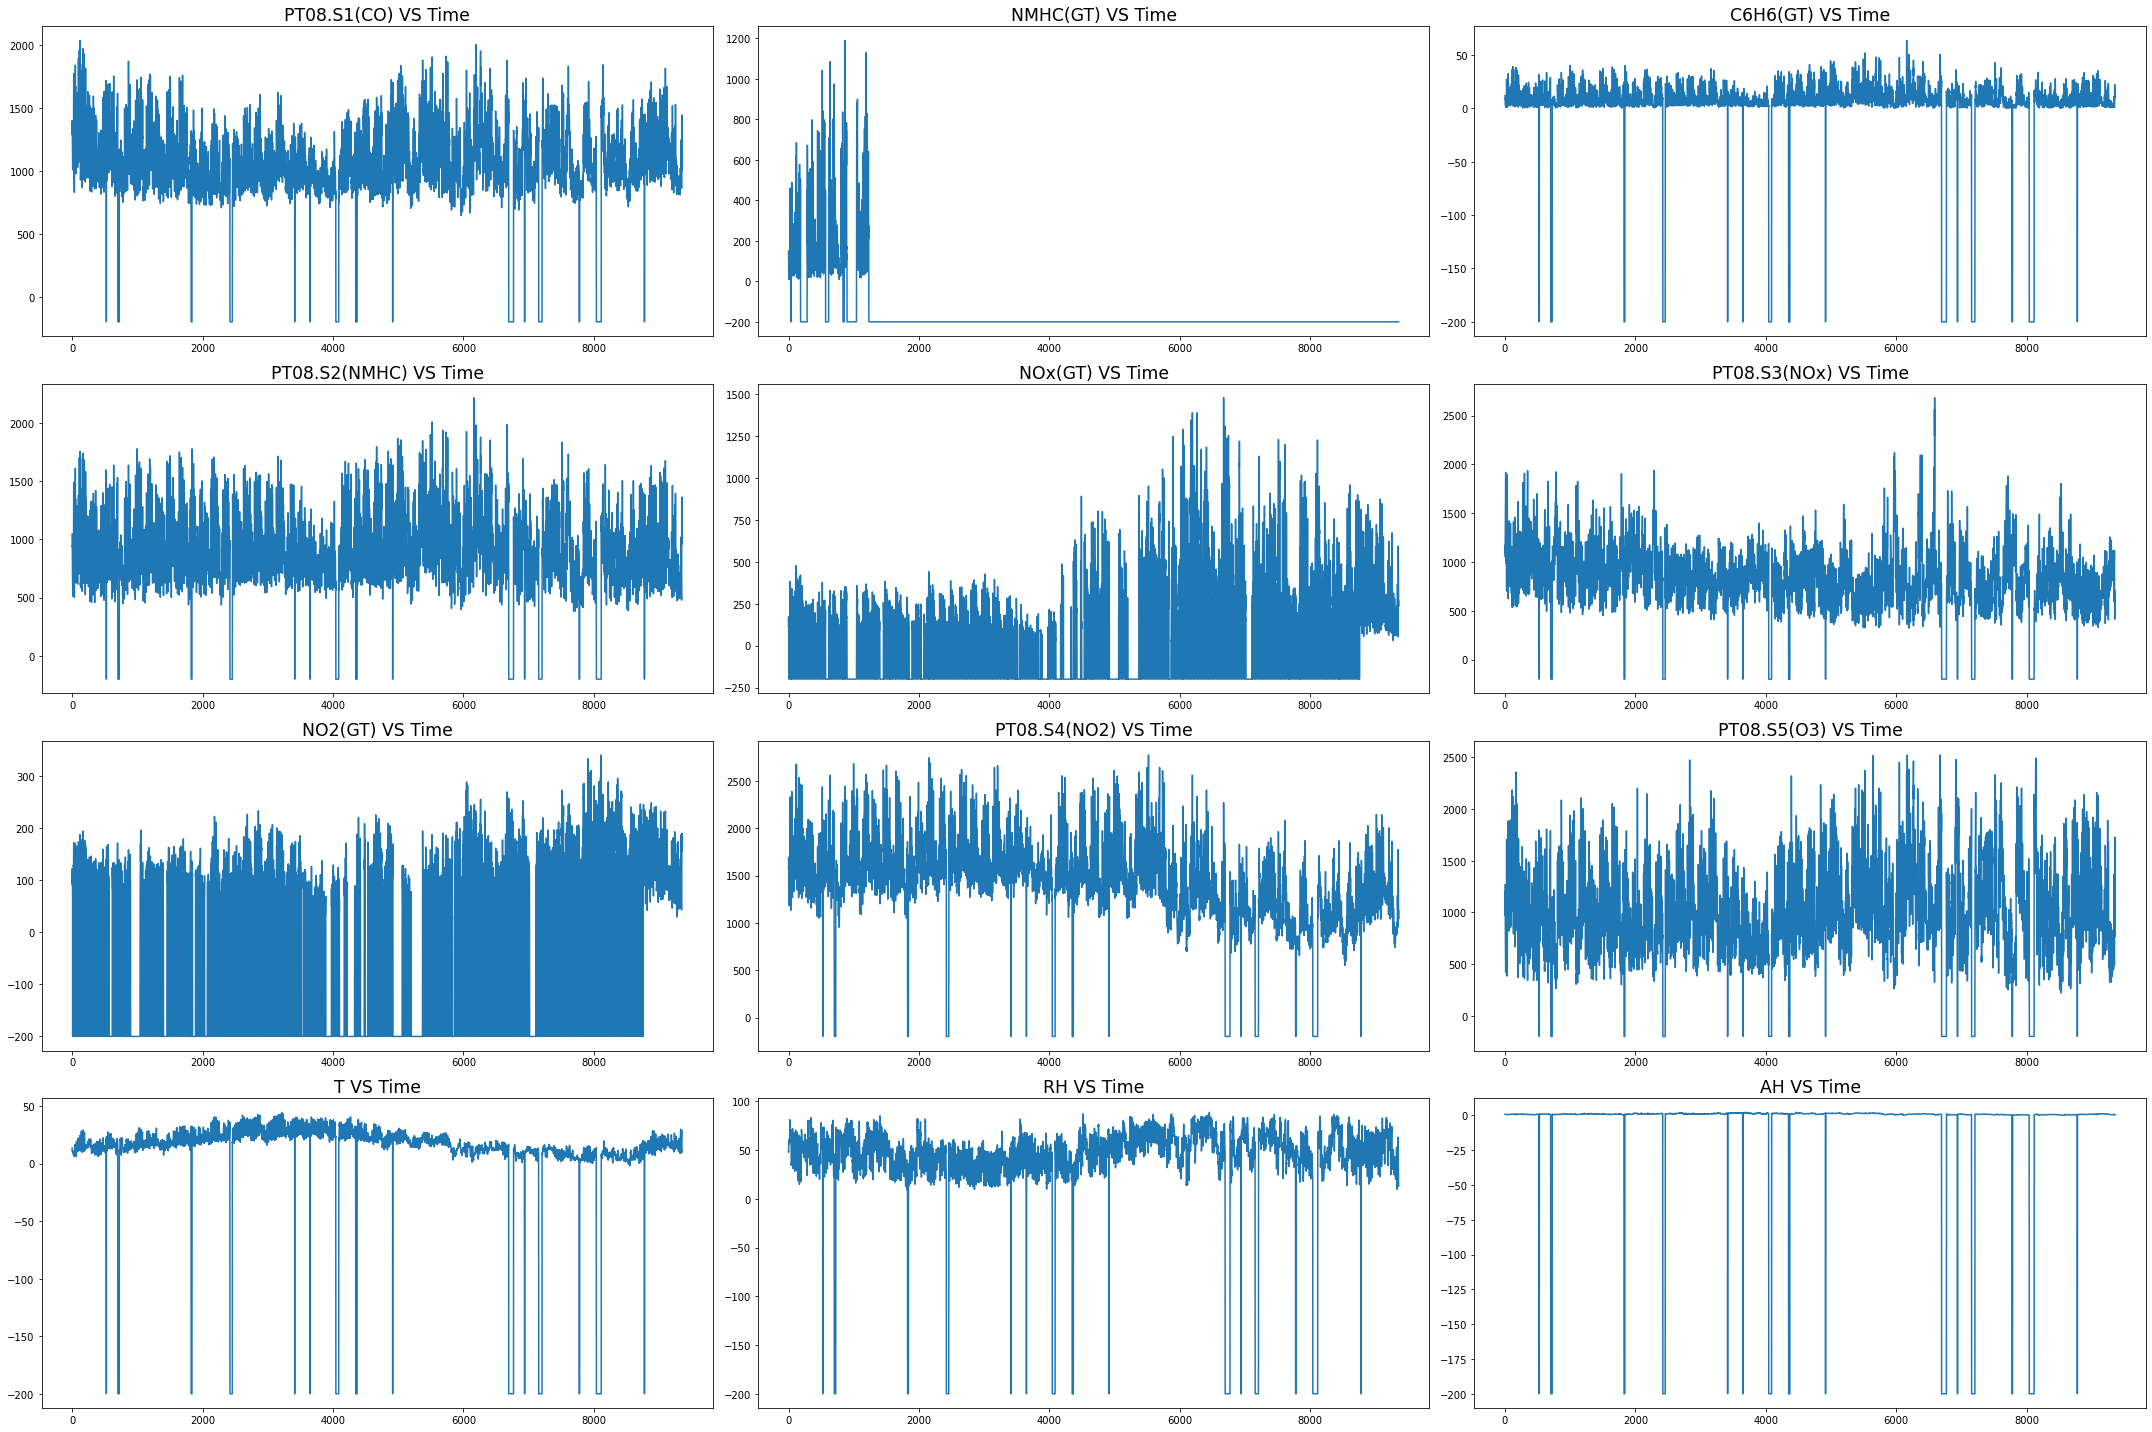

In [ ]:
feat = list(dataset.columns)
feat = feat[3:]
a = len(feat)
# We decide to use 5 columns and 3 rows
c = 1
fig = plt.figure(figsize=(30,20))
for i in feat:
    plt.subplot(4, 3, c)
    plt.title(str(i) + ' VS Time', fontsize = 'xx-large')
    #plt.ylabel(i)
    # plt.xlabel('Date')
    plt.plot(dataset[i])
    c = c + 1

plt.tight_layout()
plt.show()

By the previous plots we can notice that NMHC has a strange behaviour because after a certain date, it's value is constantly -200 (that represent Null value in this dataset). In fact, successively, we will check this strange behaviour and we will delete that column. \\

Now we are going to plot also the target variable: the CO column.


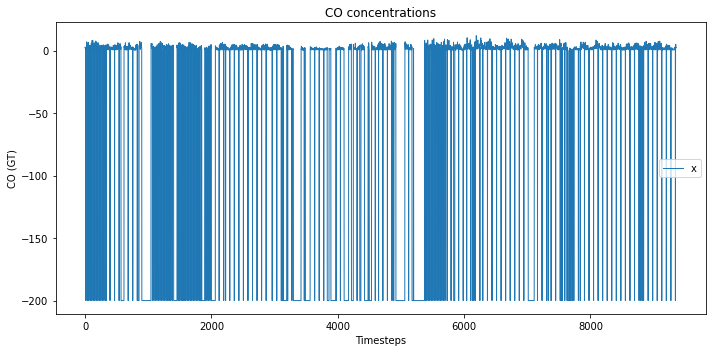

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(dataset.index, dataset['CO(GT)'], label='x', 
         linewidth=1)

# Add title and labels
plt.title('CO concentrations')
plt.xlabel('Timesteps')
plt.ylabel('CO (GT)')

# Add legend
plt.legend()

# Auto space
plt.tight_layout()

# Display plot
plt.show()

## **Data cleaning and data visualization**
So, considered what we have just seen, there aro some serious irregularities in the time series. Actually, in the description of the dataset given by the author ***(Saverio De Vito (saverio.devito '@' enea.it), ENEA - National Agency for New Technologies, Energy and Sustainable Economic Development)*** it is written that all the *Nan* values are setted to the value ***-200*** . Therefore, in our analysis we need also to take in account this foundamental information for the preprocessing of our data.

In [ ]:
# First we replace all the -200 value present in the data set with NaN

dataset = dataset.where(dataset != -200)
dataset

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0    2004-03-10  18:00:00     2.6      1360.00     150.0  11.881723   
1    2004-03-10  19:00:00     2.0      1292.25     112.0   9.397165   
2    2004-03-10  20:00:00     2.2      1402.00      88.0   8.997817   
3    2004-03-10  21:00:00     2.2      1375.50      80.0   9.228796   
4    2004-03-10  22:00:00     1.6      1272.25      51.0   6.518224   
...         ...       ...     ...          ...       ...        ...   
9352 2005-04-04  10:00:00     3.1      1314.25       NaN  13.529605   
9353 2005-04-04  11:00:00     2.4      1162.50       NaN  11.355157   
9354 2005-04-04  12:00:00     2.4      1142.00       NaN  12.374538   
9355 2005-04-04  13:00:00     2.1      1002.50       NaN   9.547187   
9356 2005-04-04  14:00:00     2.2      1070.75       NaN  11.932060   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0           1045.50    166.0       1056.25    113.0       1692.00   
1            954.75    103.0       1173.75     92.0       1558.75   
2            939.25    131.0       1140.00    114.0       1554.50   
3            948.25    172.0       1092.00    122.0       1583.75   
4            835.50    131.0       1205.00    116.0       1490.00   
...             ...      ...           ...      ...           ...   
9352        1101.25    471.7        538.50    189.8       1374.25   
9353        1027.00    353.3        603.75    179.2       1263.50   
9354        1062.50    293.0        603.25    174.7       1240.75   
9355         960.50    234.5        701.50    155.7       1041.00   
9356        1047.25    265.2        654.00    167.7       1128.50   

      PT08.S5(O3)       T         RH        AH  
0         1267.50  13.600  48.875001  0.757754  
1          972.25  13.300  47.700000  0.725487  
2         1074.00  11.900  53.975000  0.750239  
3         1203.25  11.000  60.000000  0.786713  
4         1110.00  11.150  59.575001  0.788794  
...           ...     ...        ...       ...  
9352      1728.50  21.850  29.250000  0.756824  
9353      1269.00  24.325  23.725000  0.711864  
9354      1092.00  26.900  18.350000  0.640649  
9355       769.75  28.325  13.550000  0.513866  
9356       816.00  28.500  13.125000  0.502804  

[9357 rows x 15 columns]

In [ ]:
# We print the type of the columns because we want to observe if there are some categorical variables.

for column in dataset.columns:
    print(column, ':' , dataset[column].dtype)

# In this case all the columns are numerical one (except the first two that represents the time stamp).

Date : datetime64[ns]
Time : object
CO(GT) : float64
PT08.S1(CO) : float64
NMHC(GT) : float64
C6H6(GT) : float64
PT08.S2(NMHC) : float64
NOx(GT) : float64
PT08.S3(NOx) : float64
NO2(GT) : float64
PT08.S4(NO2) : float64
PT08.S5(O3) : float64
T : float64
RH : float64
AH : float64


First, we can can observe the number of NaN values for each columns and compare them with the total number of rows (that is the length of a column).

In [ ]:
print(dataset.isnull().sum())

print('Total number of rows = ', len(dataset) )

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64
Total number of rows =  9357


As previously mentioned, the column NMHC contains a considerable number of **Null values** (more precisely: 8443/9357 = about **90%** of the total number of rows). Therefore, for our analysis we decide to remove this column.

In [ ]:
del dataset['NMHC(GT)']

By looking at the number of Null values for columns we noticed that some columns have the same number of NaN, so we thought that **maybe there are some rows** (that is: some specific hours for some specific days) **in which data were not properly collected**. \\

To fully understand what we are saying, notice that is the previous table: *PT08.S1(CO)*, *C6H6(GT)*, *PT08.S2(NMHC)*, *PT08.S3(NOx)*, *PT08.S4(NO2)*,*PT08.S5(O3)*, *T*, *RH* and *AH* column, all have 366 NaN. This may be either coincidence or a malfunction of the sensor which must collect the data and so we are going to check if this 366 rows are the same for all the columns previously listed.


Let's check if there are some **rows with more than one null value**.

In [ ]:
# We decide to use the 'AH' column (we could have chosen any other column previosuly listed without losing generality). 
# And we build another dataset by selcting only the rows which has NaN for that column (so we are building a dataset with 366 rows).

nan_check_ds = dataset[dataset['AH'].isnull()]
print(nan_check_ds)
# In the dataset there are 3 rows consecutively: 2004-04-01 14.00/15.00/16.00
# and then from 08-04-2004 23:00 to 09-04-2004 22:00
#and then others sparsely

           Date      Time  CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  \
524  2004-04-01  14:00:00     1.7          NaN       NaN            NaN   
525  2004-04-01  15:00:00     1.9          NaN       NaN            NaN   
526  2004-04-01  16:00:00     2.3          NaN       NaN            NaN   
701  2004-04-08  23:00:00     2.0          NaN       NaN            NaN   
702  2004-04-09  00:00:00     2.4          NaN       NaN            NaN   
...         ...       ...     ...          ...       ...            ...   
8111 2005-02-11  17:00:00     6.6          NaN       NaN            NaN   
8112 2005-02-11  18:00:00     6.5          NaN       NaN            NaN   
8113 2005-02-11  19:00:00     7.1          NaN       NaN            NaN   
8114 2005-02-11  20:00:00     4.9          NaN       NaN            NaN   
8777 2005-03-11  11:00:00     3.0          NaN       NaN            NaN   

      NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)   T  RH  AH  
524      99.0        

In [ ]:
# Now we visualize the number on NaN for each column for this restricted dataset.

print(nan_check_ds.isnull().sum())

Date               0
Time               0
CO(GT)            36
PT08.S1(CO)      366
C6H6(GT)         366
PT08.S2(NMHC)    366
NOx(GT)           44
PT08.S3(NOx)     366
NO2(GT)           44
PT08.S4(NO2)     366
PT08.S5(O3)      366
T                366
RH               366
AH               366
dtype: int64


So we can say that the 366 rows with NaN are the same for : PT08.S1(CO), C6H6(GT), PT08.S2(NMHC), PT08.S3(NOx), PT08.S4(NO2), PT08.S5(O3), T, RH, AH.

**NOTE: Some of these almost-null rows are consecutives. In this case, we have to manage them carefully because it means that our forecasting could be seriously invalidated (almost in a specific time range)**.

We decided not to discarge the rows containing NaN values, instead **we substitute them with means.**

In [ ]:
dataset = dataset.fillna(dataset.mean())
dataset

<ipython-input-14-eb8e3ba4ef6d>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  dataset = dataset.fillna(dataset.mean())
<ipython-input-14-eb8e3ba4ef6d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset = dataset.fillna(dataset.mean())


Date      Time  CO(GT)  PT08.S1(CO)   C6H6(GT)  PT08.S2(NMHC)  \
0    2004-03-10  18:00:00     2.6      1360.00  11.881723        1045.50   
1    2004-03-10  19:00:00     2.0      1292.25   9.397165         954.75   
2    2004-03-10  20:00:00     2.2      1402.00   8.997817         939.25   
3    2004-03-10  21:00:00     2.2      1375.50   9.228796         948.25   
4    2004-03-10  22:00:00     1.6      1272.25   6.518224         835.50   
...         ...       ...     ...          ...        ...            ...   
9352 2005-04-04  10:00:00     3.1      1314.25  13.529605        1101.25   
9353 2005-04-04  11:00:00     2.4      1162.50  11.355157        1027.00   
9354 2005-04-04  12:00:00     2.4      1142.00  12.374538        1062.50   
9355 2005-04-04  13:00:00     2.1      1002.50   9.547187         960.50   
9356 2005-04-04  14:00:00     2.2      1070.75  11.932060        1047.25   

      NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)       T  \
0       166.0       1056.25    113.0       1692.00      1267.50  13.600   
1       103.0       1173.75     92.0       1558.75       972.25  13.300   
2       131.0       1140.00    114.0       1554.50      1074.00  11.900   
3       172.0       1092.00    122.0       1583.75      1203.25  11.000   
4       131.0       1205.00    116.0       1490.00      1110.00  11.150   
...       ...           ...      ...           ...          ...     ...   
9352    471.7        538.50    189.8       1374.25      1728.50  21.850   
9353    353.3        603.75    179.2       1263.50      1269.00  24.325   
9354    293.0        603.25    174.7       1240.75      1092.00  26.900   
9355    234.5        701.50    155.7       1041.00       769.75  28.325   
9356    265.2        654.00    167.7       1128.50       816.00  28.500   

             RH        AH  
0     48.875001  0.757754  
1     47.700000  0.725487  
2     53.975000  0.750239  
3     60.000000  0.786713  
4     59.575001  0.788794  
...         ...       ...  
9352  29.250000  0.756824  
9353  23.725000  0.711864  
9354  18.350000  0.640649  
9355  13.550000  0.513866  
9356  13.125000  0.502804  

[9357 rows x 14 columns]

In [ ]:
# Let's check if we correctly replaced all the NaN values
nan_in_df = dataset.isnull().values.any()
nan_in_df

False

Finally, we have the dataset which we will compute our analysis with.

In [ ]:
dataset.describe(include = 'all')

<ipython-input-16-a7fe9e1cc73d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dataset.describe(include = 'all')


Date      Time       CO(GT)  PT08.S1(CO)     C6H6(GT)  \
count                  9357      9357  9357.000000  9357.000000  9357.000000   
unique                  391        24          NaN          NaN          NaN   
top     2004-09-21 00:00:00  18:00:00          NaN          NaN          NaN   
freq                     24       390          NaN          NaN          NaN   
first   2004-03-10 00:00:00       NaN          NaN          NaN          NaN   
last    2005-04-04 00:00:00       NaN          NaN          NaN          NaN   
mean                    NaN       NaN     2.152750  1099.707856    10.082993   
std                     NaN       NaN     1.316068   212.796116     7.302474   
min                     NaN       NaN     0.100000   647.250000     0.149048   
25%                     NaN       NaN     1.200000   941.250000     4.591495   
50%                     NaN       NaN     2.152750  1074.500000     8.593367   
75%                     NaN       NaN     2.600000  1221.250000    13.636091   
max                     NaN       NaN    11.900000  2039.750000    63.741476   

        PT08.S2(NMHC)      NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  \
count     9357.000000  9357.000000   9357.000000  9357.000000   9357.000000   
unique            NaN          NaN           NaN          NaN           NaN   
top               NaN          NaN           NaN          NaN           NaN   
freq              NaN          NaN           NaN          NaN           NaN   
first             NaN          NaN           NaN          NaN           NaN   
last              NaN          NaN           NaN          NaN           NaN   
mean       939.029205   246.881252    835.370973   113.075515   1456.143486   
std        261.557856   193.419417    251.741784    43.911095    339.365351   
min        383.250000     2.000000    322.000000     2.000000    551.000000   
25%        742.500000   112.000000    665.500000    85.900000   1241.500000   
50%        923.250000   229.000000    817.500000   113.075515   1456.143486   
75%       1104.750000   284.200000    960.250000   133.000000   1662.000000   
max       2214.000000  1479.000000   2682.750000   339.700000   2775.000000   

        PT08.S5(O3)            T           RH           AH  
count   9357.000000  9357.000000  9357.000000  9357.000000  
unique          NaN          NaN          NaN          NaN  
top             NaN          NaN          NaN          NaN  
freq            NaN          NaN          NaN          NaN  
first           NaN          NaN          NaN          NaN  
last            NaN          NaN          NaN          NaN  
mean    1022.780725    18.316054    49.232360     1.025530  
std      390.609000     8.658396    16.974308     0.395836  
min      221.000000    -1.900000     9.175000     0.184679  
25%      741.750000    12.025000    36.550000     0.746115  
50%      982.500000    18.275000    49.232360     1.015441  
75%     1255.250000    24.075000    61.875000     1.296223  
max     2522.750000    44.600000    88.725000     2.231036

We plot again all the columns of the dataset after removing the NaN values for observing the time series which we use for our analysis. \\
We plot also a **box plot** for observing the behaviour of the outliers and the range of values assumed by the variables.

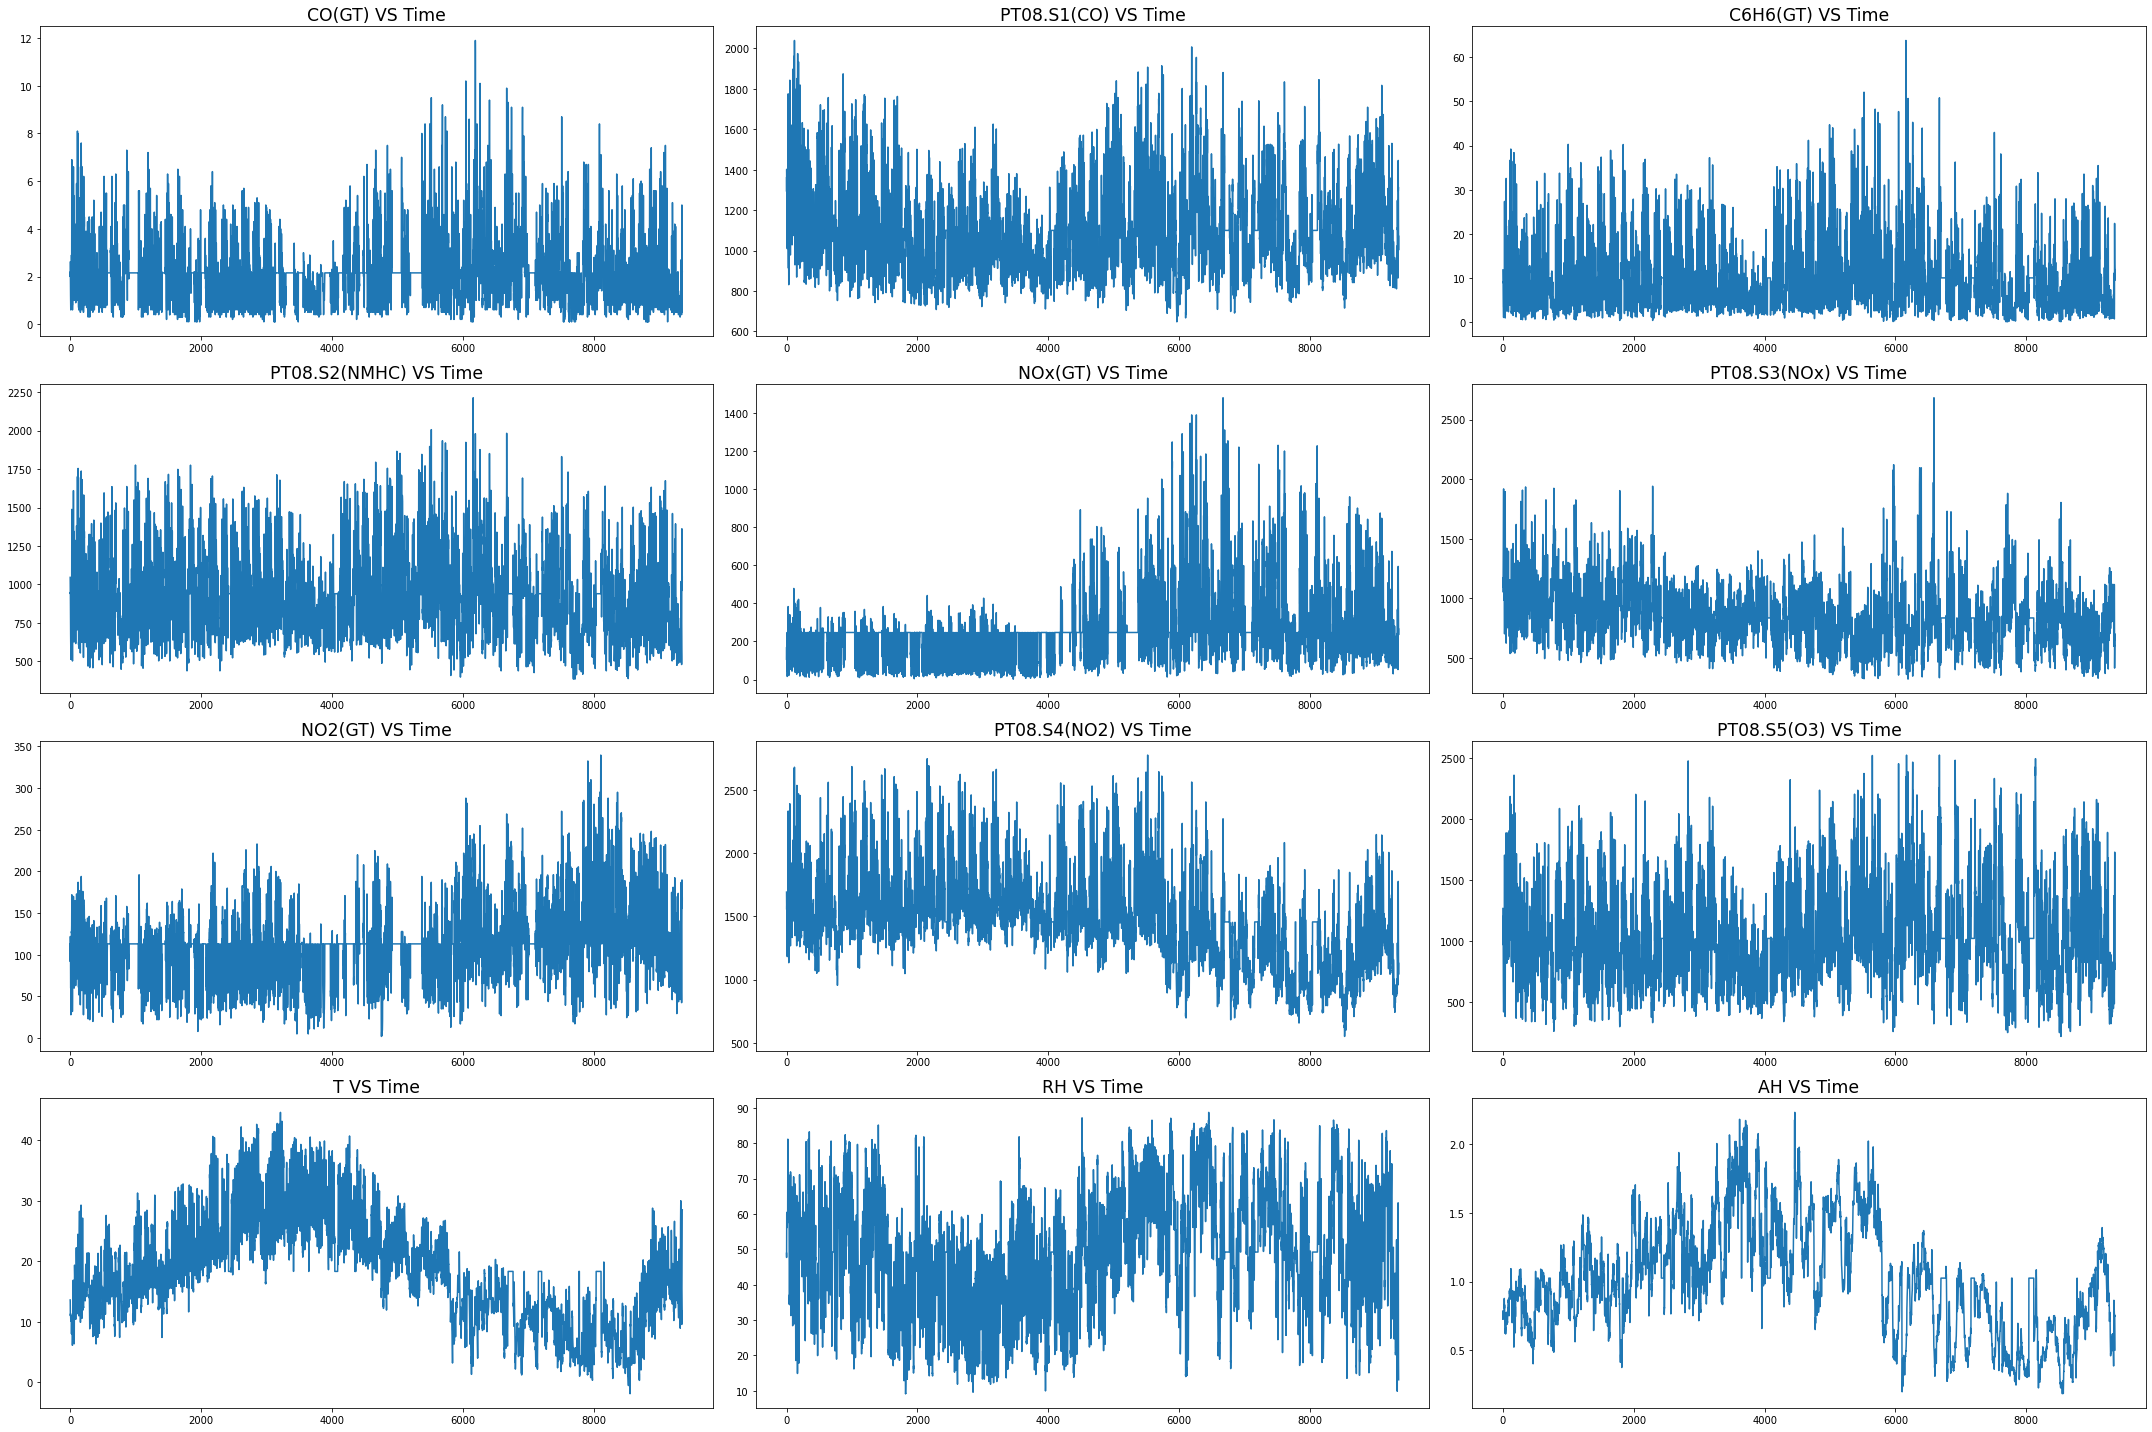

In [ ]:
feat = list(dataset.columns)
feat = feat[2:]
a = len(feat)
# We decide to use 4 columns and 4 rows
c = 1
fig = plt.figure(figsize=(30,20))
for i in feat:
    plt.subplot(4, 3, c)
    plt.title(str(i) + ' VS Time', fontsize = 'xx-large')
    #plt.ylabel(i)
    # plt.xlabel('Date')
    plt.plot(dataset[i])
    c = c + 1

plt.tight_layout()
plt.show()

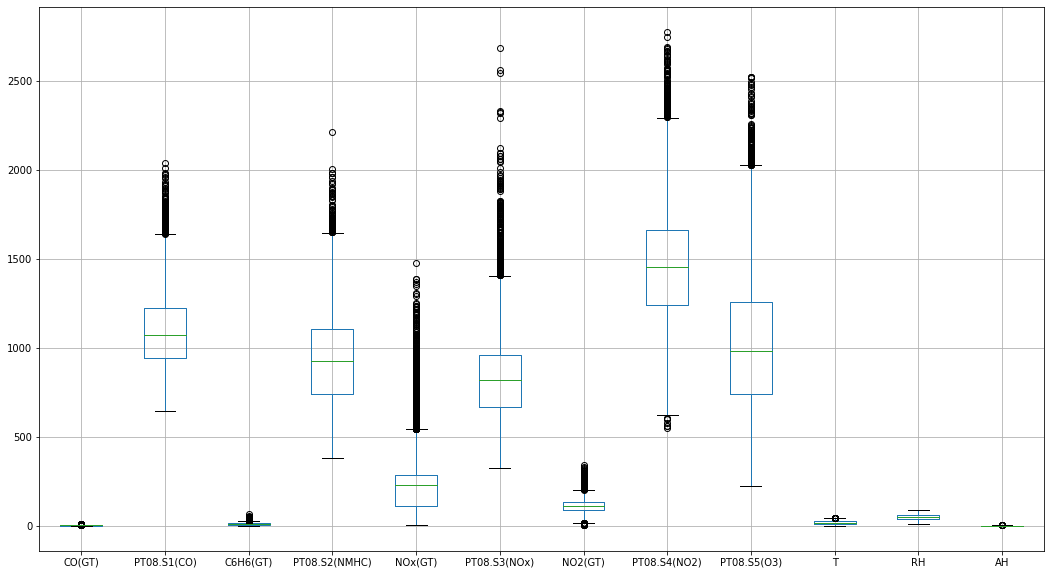

In [ ]:
dataset.boxplot(figsize= (18,10))

We can plot the **CO concentrations** and show that the negative values (-200) are no longer there.

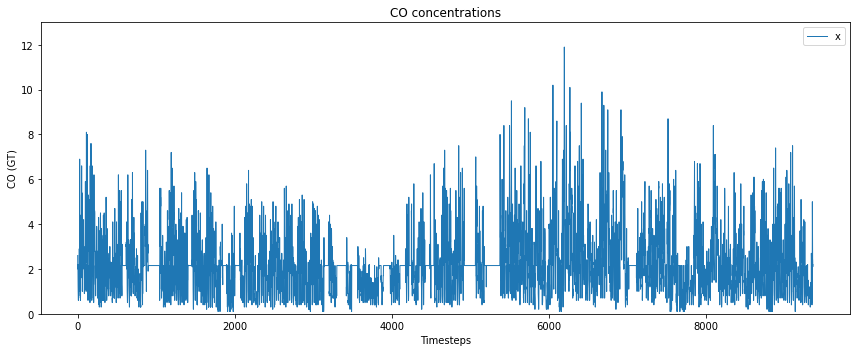

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(dataset.index, dataset['CO(GT)'], label='x', 
         linewidth=1)

# Add title and labels
plt.title('CO concentrations')
plt.xlabel('Timesteps')
plt.ylabel('CO (GT)')
plt.ylim(0,13)


# Add legend
plt.legend()

# Auto space
plt.tight_layout()

# Display plot
plt.show()

We want to see the behaviour of CO per day for observing if there are some repeated pattern during the year.

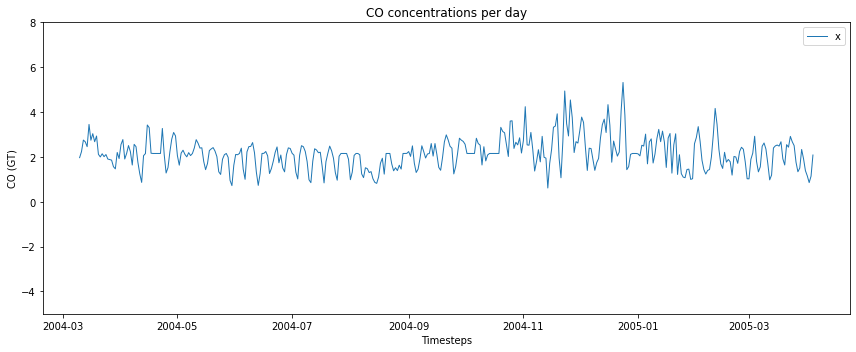

In [ ]:
# So we need first to group the data then we calculate the mean of CO per day and we plot it.

df = dataset.groupby('Date').mean()

plt.figure(figsize=(12,5))
plt.plot(df.index, df['CO(GT)'], label='x', 
         linewidth=1)

plt.title('CO concentrations per day')
plt.xlabel('Timesteps')
plt.ylabel('CO (GT)')
plt.ylim(-5,8)


plt.legend()

# Auto space
plt.tight_layout()

plt.show()

Now, we want to see if the concentration of CO is characterized by the hour.

So we build a plot for each hour which contains the CO information for that hour during all the year.


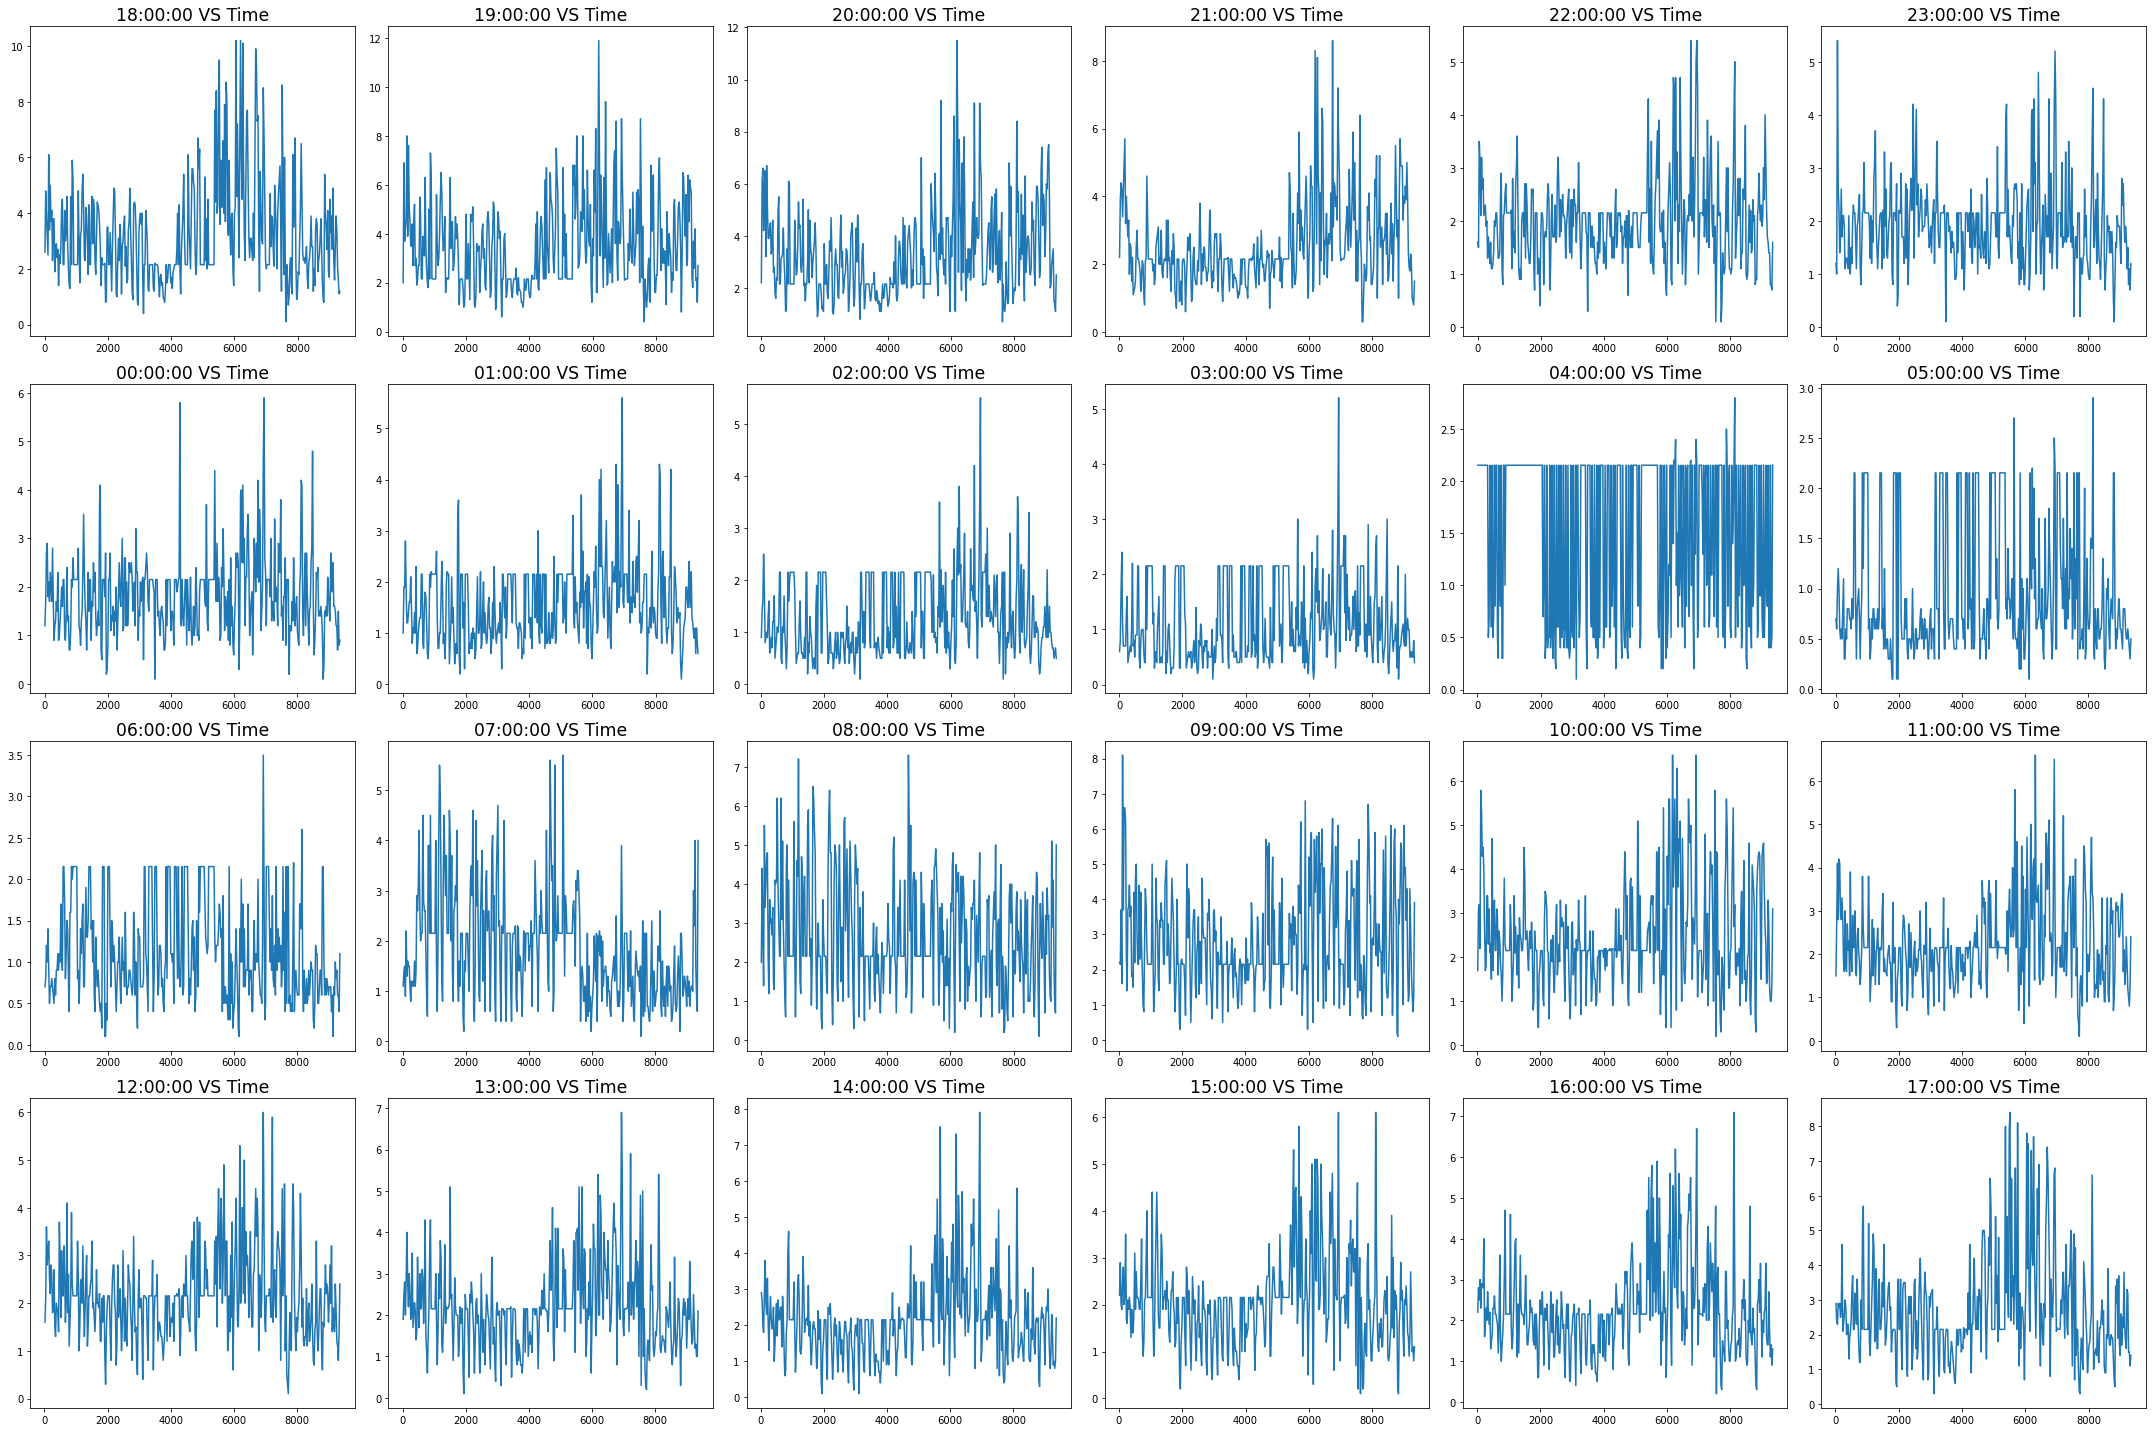

In [ ]:
hour = dataset['Time'].unique()
a = len(hour)

# We decide to use 4 columns and 6 rows
c = 1
fig = plt.figure(figsize=(30,20))
for i in hour:
    plt.subplot(4, 6, c)
    plt.title(str(i) + ' VS Time', fontsize = 'xx-large')
    #plt.ylabel(i)
    # plt.xlabel('Date')
    plt.plot(dataset[dataset['Time'] == i]['CO(GT)'])
    c = c + 1

plt.tight_layout()
plt.show()

#We notice that often there are collected -200 values at 04:00:00. But there are not evident pattern that can be useful for the analysis.

## **Correlation**

In [ ]:
# calculate the correlation matrix
corr = dataset.corr()

# plot the correlation matrix (but only half matrix)
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

<ipython-input-22-da98bff97c8a>:8: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (corr


We notice an high positive correlation between *PT08.S2(NMHC)* and *C6H6(GT)* so we may decide to delete one of the two. (In the end we decide to keep both)

## **Normalization**

We apply two possible normalization to our dataset: Min-Max and Standard normalization and we look at the two normalized dataset to observe possible difference between this two for deciding which of the two to use.

In [ ]:
df_original = dataset.drop(columns = ['Date', 'Time'])

#### **MIN-MAX** normalization:

In [ ]:
#Normalising data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df_original.values) # (df-df.min())/(df.max()-df.min())

df = pd.DataFrame(df_scaled, columns = df.columns)
df

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  PT08.S3(NOx)  \
0     0.211864     0.511849  0.184498       0.361737  0.111036      0.311024   
1     0.161017     0.463196  0.145428       0.312167  0.068382      0.360796   
2     0.177966     0.542011  0.139148       0.303701  0.087339      0.346500   
3     0.177966     0.522980  0.142780       0.308617  0.115098      0.326168   
4     0.127119     0.448833  0.100156       0.247030  0.087339      0.374034   
...        ...          ...       ...            ...       ...           ...   
9352  0.254237     0.478995  0.210411       0.392189  0.318009      0.091708   
9353  0.194915     0.370018  0.176218       0.351632  0.237847      0.119348   
9354  0.194915     0.355296  0.192248       0.371023  0.197021      0.119136   
9355  0.169492     0.255117  0.147787       0.315308  0.157414      0.160754   
9356  0.177966     0.304129  0.185290       0.362693  0.178199      0.140633   

       NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)         T        RH        AH  
0     0.328694      0.513040     0.454654  0.333333  0.499057  0.280046  
1     0.266509      0.453125     0.326382  0.326882  0.484287  0.264279  
2     0.331655      0.451214     0.370588  0.296774  0.563168  0.276374  
3     0.355345      0.464366     0.426741  0.277419  0.638906  0.294198  
4     0.337578      0.422212     0.386228  0.280645  0.633564  0.295215  
...        ...           ...          ...       ...       ...       ...  
9352  0.556115      0.370166     0.654936  0.510753  0.252357  0.279592  
9353  0.524726      0.320369     0.455306  0.563978  0.182904  0.257621  
9354  0.511401      0.310139     0.378408  0.619355  0.115336  0.222820  
9355  0.455138      0.220324     0.238406  0.650000  0.054997  0.160865  
9356  0.490672      0.259667     0.258499  0.653763  0.049654  0.155459  

[9357 rows x 12 columns]

In [ ]:
df.describe(include = 'all').T

count      mean       std  min       25%       50%       75%  \
CO(GT)         9357.0  0.173962  0.111531  0.0  0.093220  0.173962  0.211864   
PT08.S1(CO)    9357.0  0.324925  0.152816  0.0  0.211131  0.306822  0.412208   
C6H6(GT)       9357.0  0.156213  0.114832  0.0  0.069858  0.132788  0.212086   
PT08.S2(NMHC)  9357.0  0.303580  0.142869  0.0  0.196231  0.294961  0.394101   
NOx(GT)        9357.0  0.165796  0.130954  0.0  0.074475  0.153690  0.191063   
PT08.S3(NOx)   9357.0  0.217461  0.106636  0.0  0.145505  0.209891  0.270359   
NO2(GT)        9357.0  0.328918  0.130030  0.0  0.248445  0.328918  0.387918   
PT08.S4(NO2)   9357.0  0.406989  0.152592  0.0  0.310477  0.406989  0.499550   
PT08.S5(O3)    9357.0  0.348335  0.169701  0.0  0.226241  0.330835  0.449332   
T              9357.0  0.434754  0.186202  0.0  0.299462  0.433871  0.558602   
RH             9357.0  0.503549  0.213379  0.0  0.344123  0.503549  0.662476   
AH             9357.0  0.410902  0.193434  0.0  0.274359  0.405971  0.543182   

               max  
CO(GT)         1.0  
PT08.S1(CO)    1.0  
C6H6(GT)       1.0  
PT08.S2(NMHC)  1.0  
NOx(GT)        1.0  
PT08.S3(NOx)   1.0  
NO2(GT)        1.0  
PT08.S4(NO2)   1.0  
PT08.S5(O3)    1.0  
T              1.0  
RH             1.0  
AH             1.0

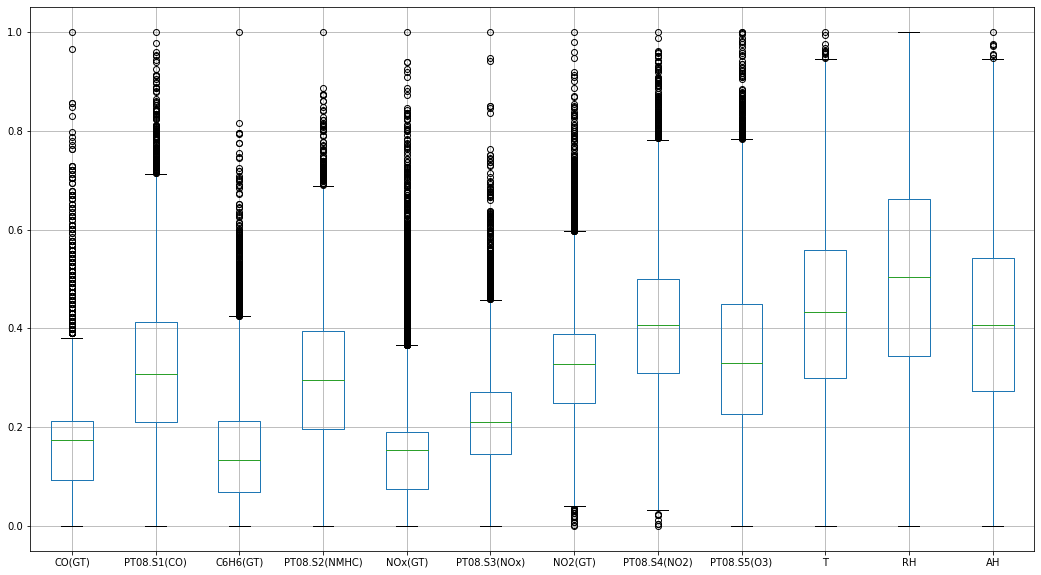

In [ ]:
df.boxplot(figsize= (18,10))

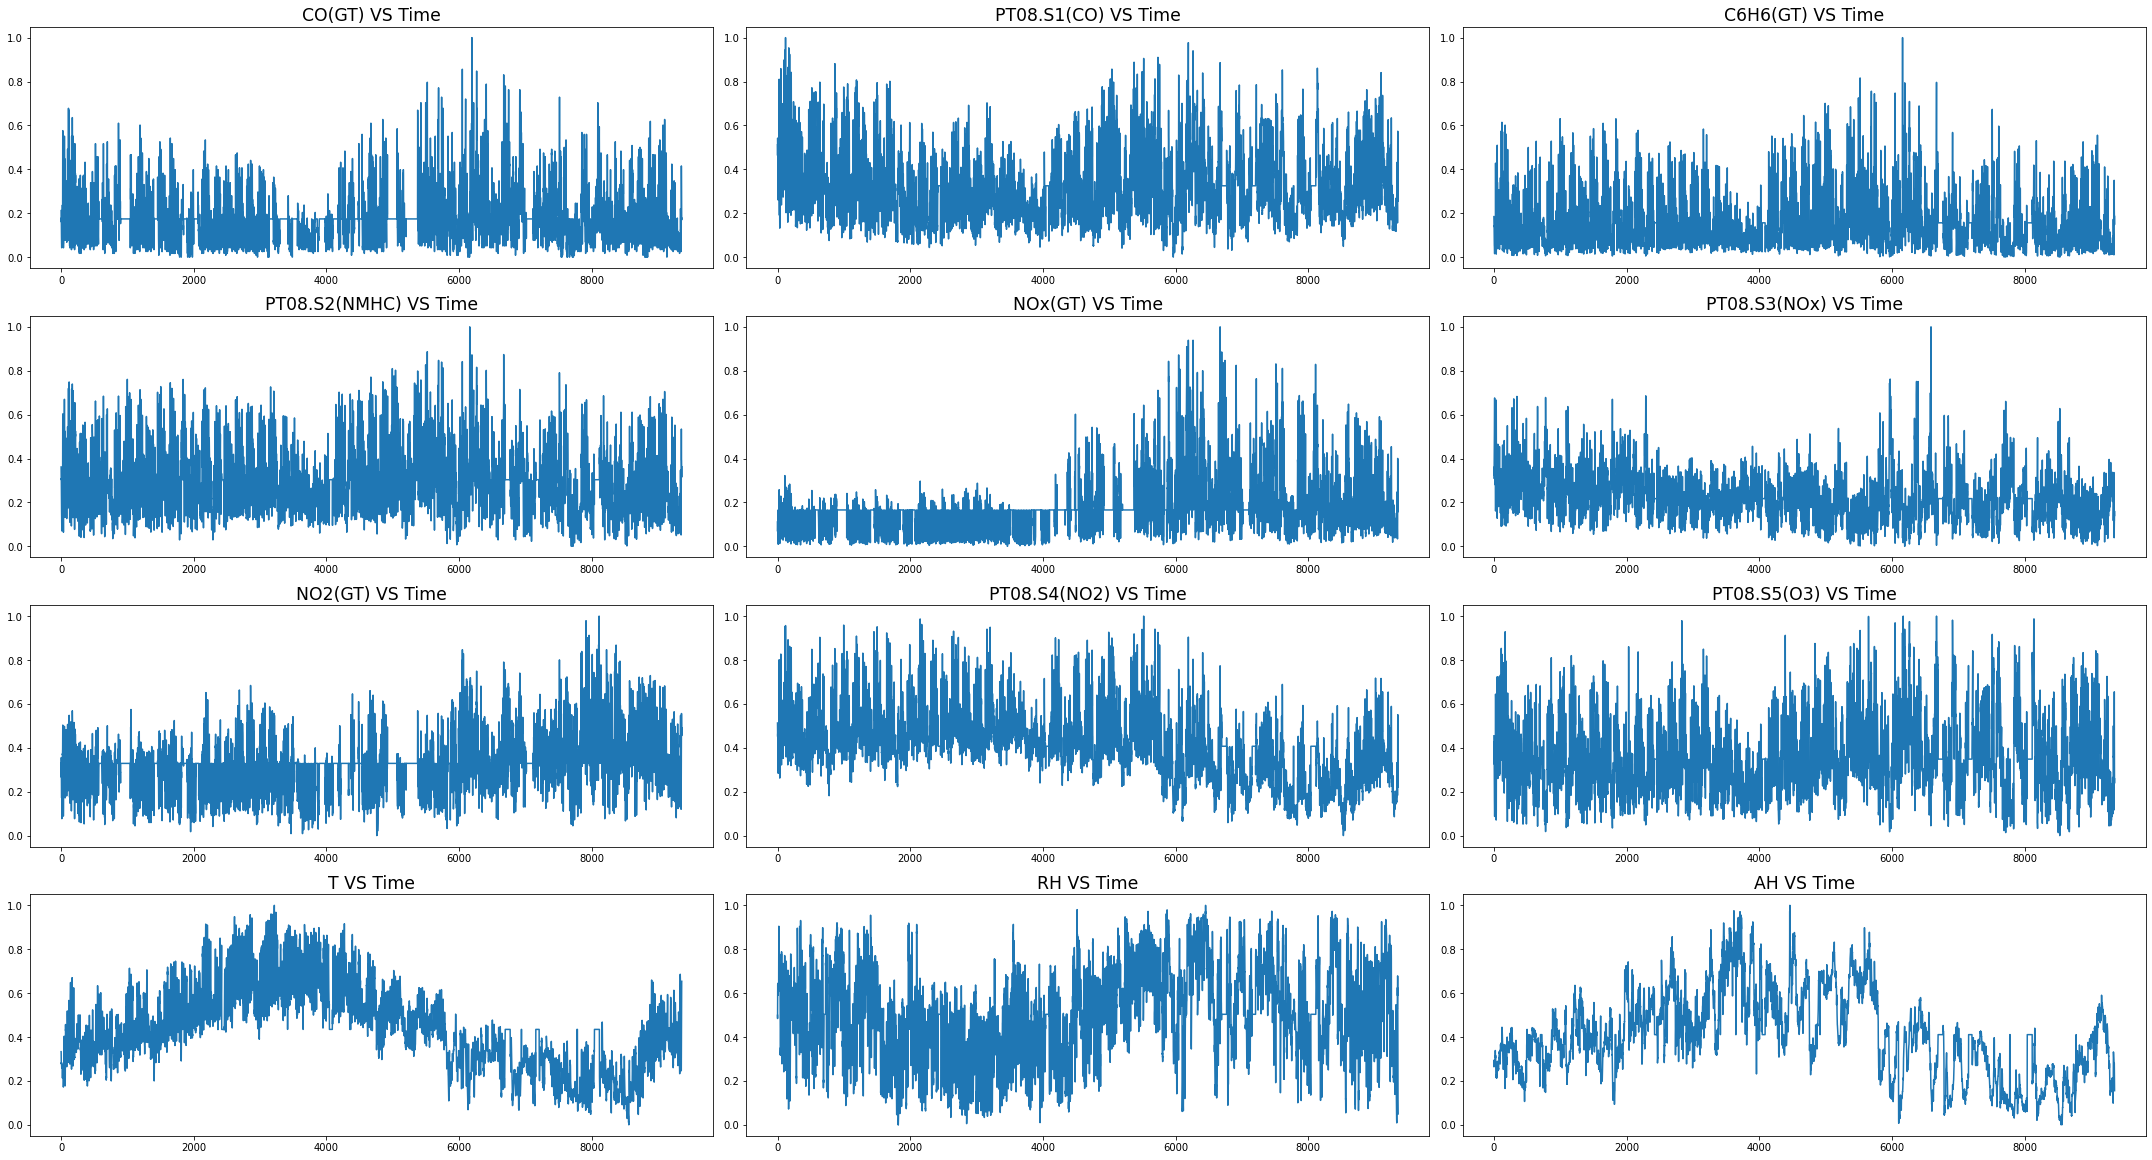

In [ ]:
feat = list(df.columns)

a = len(feat)
# We decide to use 5 columns and 3 rows
c = 1
fig = plt.figure(figsize=(30,20))
for i in feat:
    plt.subplot(5, 3, c)
    plt.title(str(i) + ' VS Time', fontsize = 'xx-large')
    #plt.ylabel(i)
    # plt.xlabel('Date')
    plt.plot(df[i])
    c = c + 1

plt.tight_layout()
plt.show()

#### **STANDARD** normalization

In [ ]:
#Normalising data
from sklearn.preprocessing import StandardScaler

scaler_st = StandardScaler()
df_st_scaled = scaler_st.fit_transform(df_original.values) # df = (df-df.mean())/(df.std)

df_st = pd.DataFrame(df_st_scaled, columns = df.columns)
df_st

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  PT08.S3(NOx)  \
0     0.339856     1.223265  0.246331       0.407086 -0.418187      0.877450   
1    -0.116071     0.904868 -0.093922       0.060108 -0.743922      1.344223   
2     0.035905     1.420648 -0.148612       0.000844 -0.599151      1.210150   
3     0.035905     1.296109 -0.116980       0.035255 -0.387165      1.019468   
4    -0.420023     0.810876 -0.488185      -0.395839 -0.599151      1.468365   
...        ...          ...       ...            ...       ...           ...   
9352  0.719796     1.008259  0.472004       0.620243  1.162400     -1.179331   
9353  0.187881     0.295097  0.174219       0.336352  0.550226     -0.920123   
9354  0.187881     0.198756  0.313821       0.472084  0.238452     -0.922109   
9355 -0.040083    -0.456837 -0.073377       0.082093 -0.064016     -0.531807   
9356  0.035905    -0.136090  0.253224       0.413777  0.094715     -0.720503   

       NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)         T        RH        AH  
0    -0.001720      0.695030     0.626540 -0.544709 -0.021054 -0.676520  
1    -0.479984      0.302364    -0.129371 -0.579359 -0.090280 -0.758039  
2     0.021055      0.289840     0.131134 -0.741061  0.279416 -0.695505  
3     0.203251      0.376035     0.462045 -0.845012  0.634383 -0.603357  
4     0.066604      0.099770     0.223302 -0.827686  0.609344 -0.598098  
...        ...           ...          ...       ...       ...       ...  
9352  1.747362     -0.241327     1.806812  0.408174 -1.177275 -0.678868  
9353  1.505952     -0.567688     0.630381  0.694039 -1.502784 -0.792458  
9354  1.403467     -0.634729     0.177218  0.991454 -1.819456 -0.972378  
9355  0.970752     -1.223359    -0.647820  1.156043 -2.102252 -1.292687  
9356  1.244046     -0.965511    -0.529409  1.176256 -2.127291 -1.320635  

[9357 rows x 12 columns]

In [ ]:
df_st.describe(include = 'all').T

count          mean       std       min       25%  \
CO(GT)         9357.0  0.000000e+00  1.000053 -1.559842 -0.723975   
PT08.S1(CO)    9357.0  7.289954e-17  1.000053 -2.126364 -0.744686   
C6H6(GT)       9357.0  4.252473e-17  1.000053 -1.360426 -0.752045   
PT08.S2(NMHC)  9357.0  4.252473e-17  1.000053 -2.124994 -0.751420   
NOx(GT)        9357.0 -8.808695e-17  1.000053 -1.266131 -0.697388   
PT08.S3(NOx)   9357.0 -1.214992e-16  1.000053 -2.039385 -0.674819   
NO2(GT)        9357.0  3.280479e-16  1.000053 -2.529690 -0.618909   
PT08.S4(NO2)   9357.0 -4.859970e-17  1.000053 -2.667308 -0.632519   
PT08.S5(O3)    9357.0 -1.883238e-16  1.000053 -2.052752 -0.719507   
T              9357.0 -1.457991e-16  1.000053 -2.334974 -0.726623   
RH             9357.0  9.112443e-17  1.000053 -2.360008 -0.747190   
AH             9357.0 -2.429985e-16  1.000053 -2.124356 -0.705924   

                        50%       75%       max  
CO(GT)         0.000000e+00  0.339856  7.406737  
PT08.S1(CO)   -1.184665e-01  0.571198  4.417808  
C6H6(GT)      -2.040002e-01  0.486587  7.348380  
PT08.S2(NMHC) -6.033101e-02  0.633625  4.874787  
NOx(GT)       -9.245301e-02  0.192952  6.370532  
PT08.S3(NOx)  -7.099309e-02  0.496087  7.338781  
NO2(GT)        3.236452e-16  0.453770  5.161260  
PT08.S4(NO2)   0.000000e+00  0.606625  3.886452  
PT08.S5(O3)   -1.031284e-01  0.595178  3.840284  
T             -4.741824e-03  0.665164  3.035822  
RH             0.000000e+00  0.744850  2.326737  
AH            -2.549052e-02  0.683888  3.045632

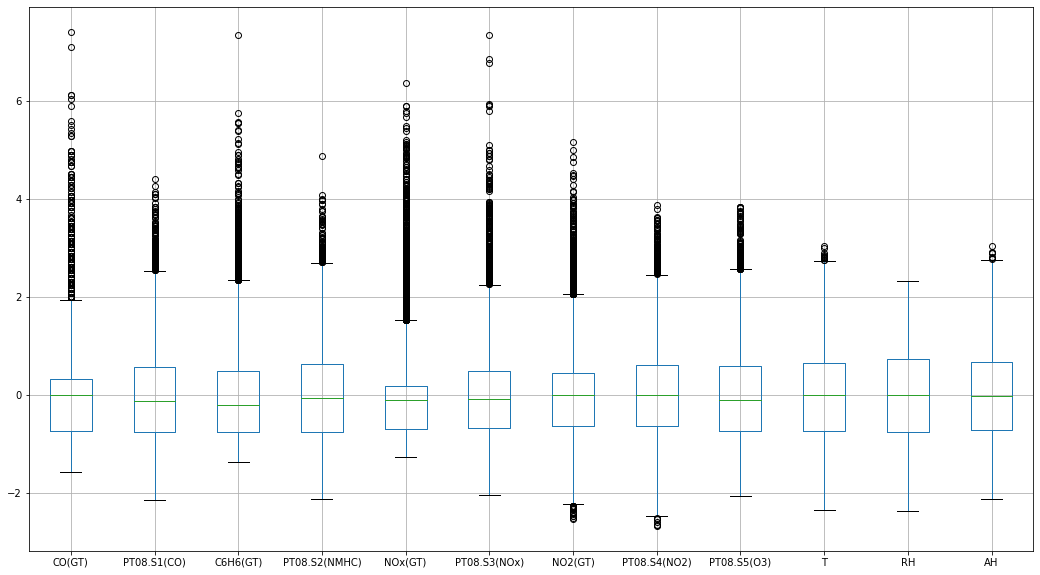

In [ ]:
df_st.boxplot(figsize= (18,10))

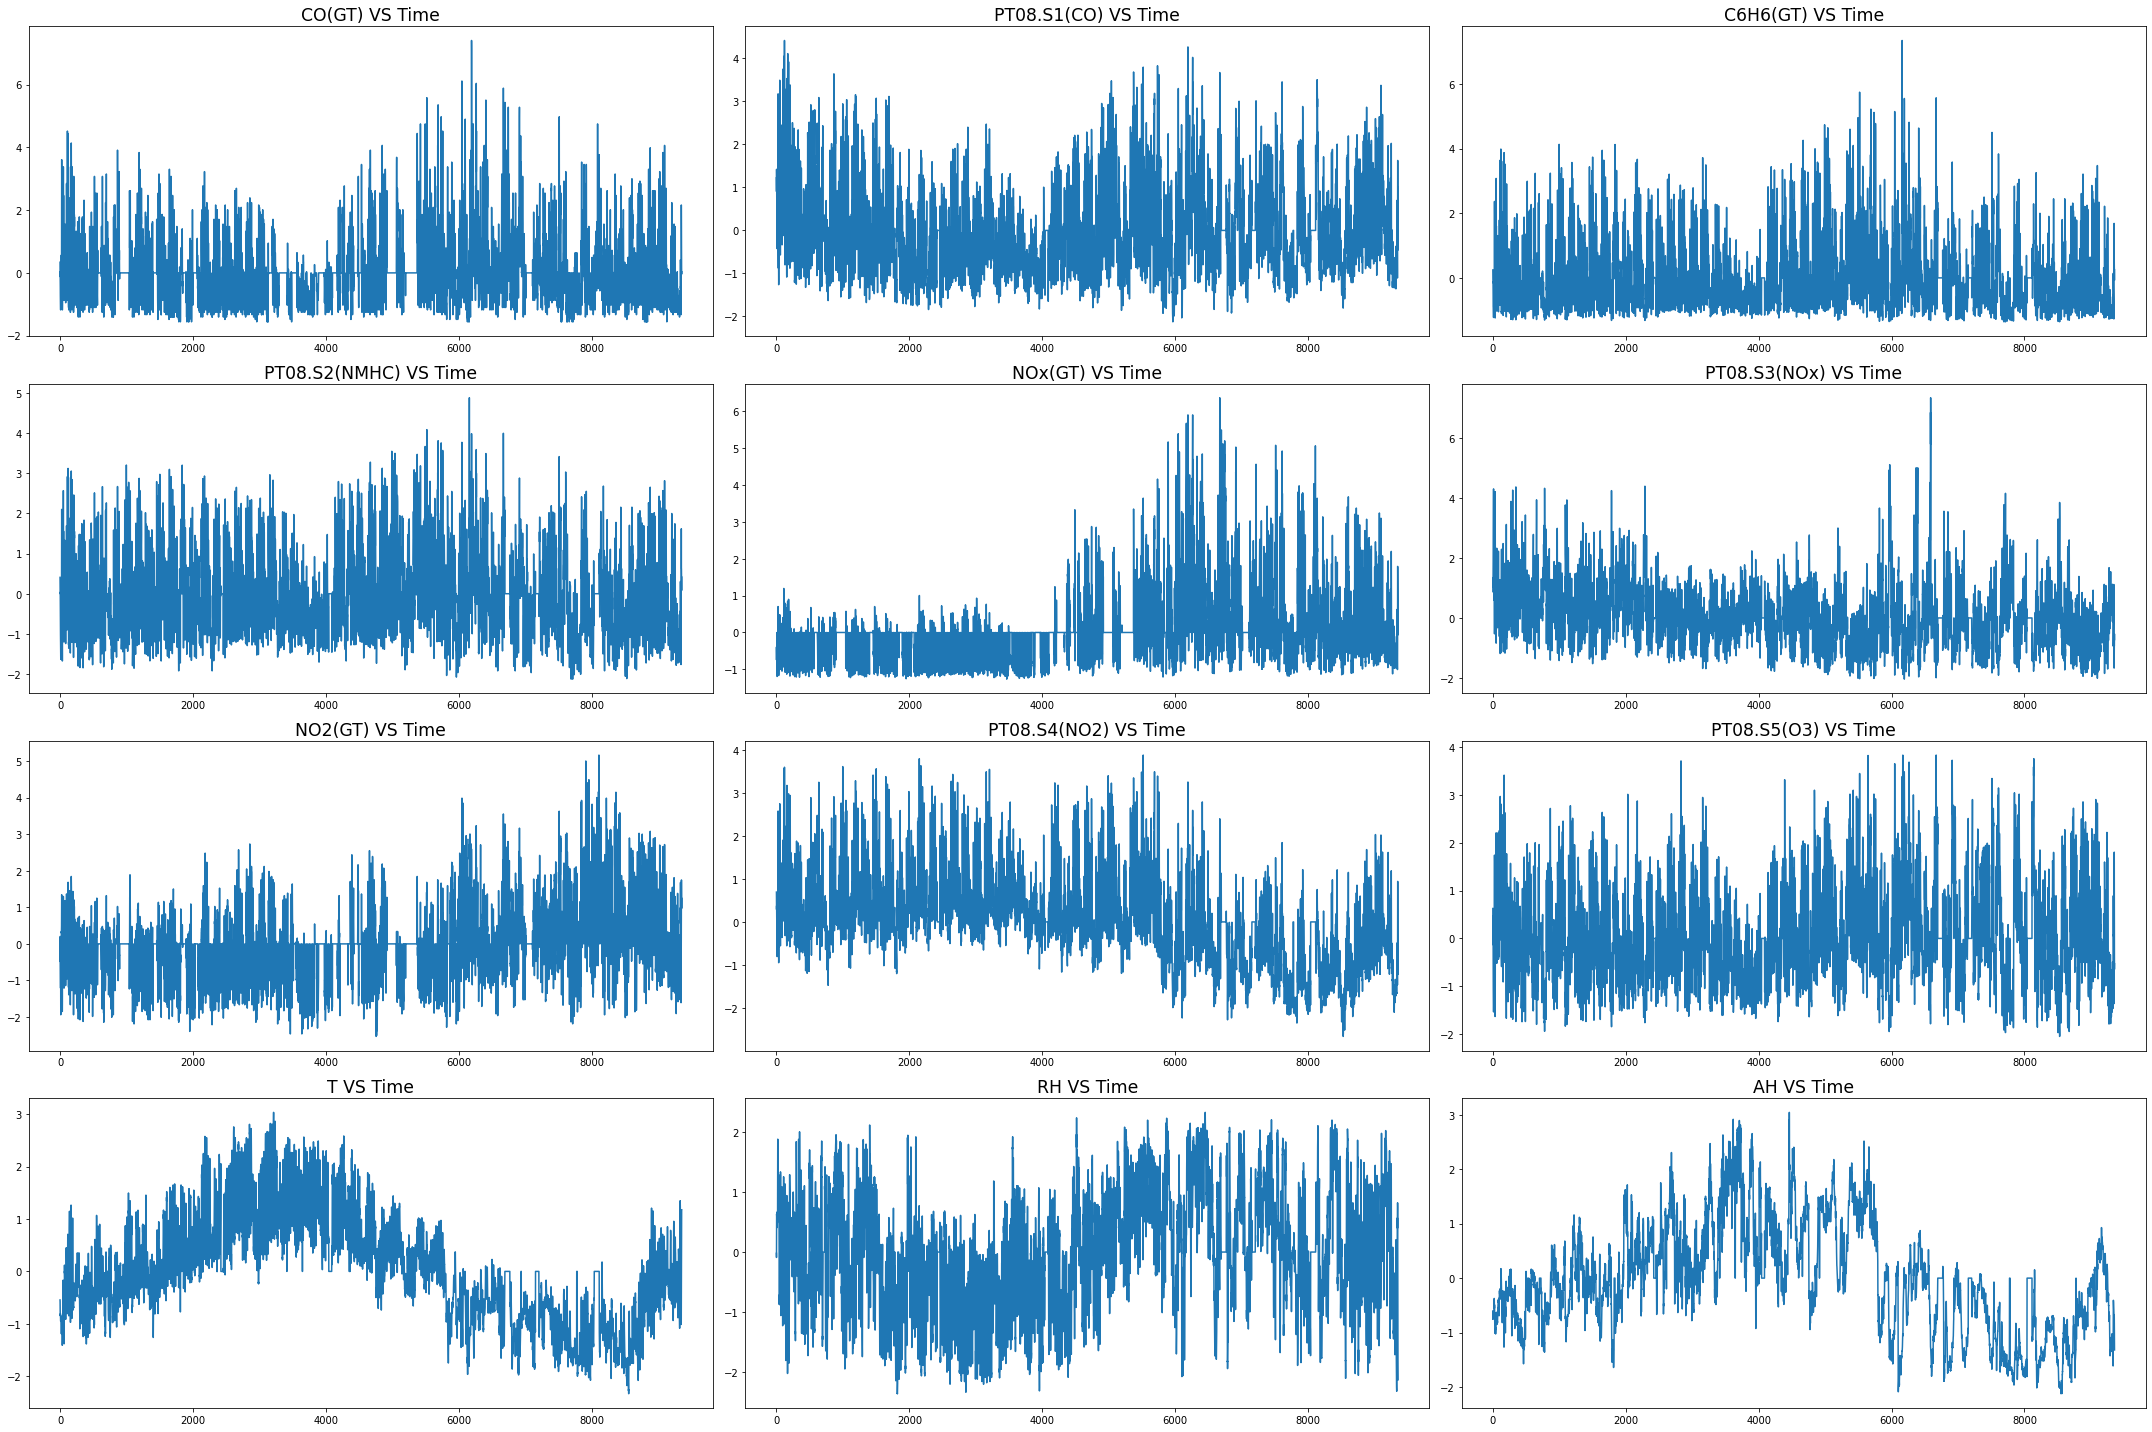

In [ ]:
feat = list(df_st.columns)
a = len(feat)

# We decide to use 4 columns and 3 rows
c = 1
fig = plt.figure(figsize=(30,20))
for i in feat:
    plt.subplot(4, 3, c)
    plt.title(str(i) + ' VS Time', fontsize = 'xx-large')
    #plt.ylabel(i)
    # plt.xlabel('Date')
    plt.plot(df_st[i])
    c = c + 1

plt.tight_layout()
plt.show()

By comparing all the results obtained, we notice that there are no noticeable difference between the data obtained by the two scaler. So we decide to use the data scaled with the Min-Max scaler.

## **CO forecasting with LSTM**
Let's specify what we want to do: **for each hour we want to predict the CO concentration based on the CO concentration values of the two previous days by using LSTM and Bidirectional-LSTM.**

#### **Preparing dataset**

Since there are some constraints concerning the input shape of these models, we're going to do this:
- we split the dataset in **two tensors X and Y** with shape respectively **(n_obs-lookback, lookback, n_features)** and **(n_obs-lookback, 1)**. The first tensor contains for each hour (so for each timestep) the array containing the lookback previous observation (each observation has 12 features, included the CO concentration). The second tensor contains for each timestep the corresponding CO concentration value. In this way we can make the model supervised.
- we split X and Y in in two sets: one for the **training (75%)** and the other for the **testing (25%)**

In [ ]:
lookback = 24*2
step = 1
delay = 24
batch_size = 1
train_size = int(len(df)*0.75)
test_size = len(df) - train_size
print(train_size, test_size)

7017 2340


In [ ]:
#Creating a window for previous data
def to_supervised(train, lookback):
  X = []
  Y = []
  for i in range(lookback, len(train)):
    X.append(train.iloc[i-lookback:i,:])
    Y.append(train.iloc[i,0:1])
    
  return X,Y

In [ ]:
X, Y = to_supervised(train = df, lookback = lookback)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)

Y (9309, 1)
X (9309, 48, 12)


In [ ]:
#Splitting the dataset
X_train, X_test = X[:train_size,] , X[train_size:,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[:train_size,0:1] , Y[train_size:,0:1]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

# per ogni elemento che voglio prevedere (Y) ho a disposizion come un mini dataset 
# fatto dalle 48 osservazioni precedenti, quindi di size 48*12 (ho 12 colonne)

X_train (7017, 48, 12)
X_test (2292, 48, 12)
Y_train (7017, 1)
Y_test (2292, 1)


In [ ]:
# For plotting the results of the prediction we need also the Data column that has been dropped 
# from the dataset we are using for creating train and test. So we save them into another variable

train_data, test_data =  dataset['Date'][48:train_size+48] , dataset['Date'][train_size+48:]
print( len(train_data), len(test_data))

#I start taking the data from the 48 instance because I need 48 observation for the prediction of the 49th so I cannot predict the 48 observation.

7017 2292


#### **LSTM 1**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM

# Build the model
model_lstm_1 = Sequential()

model_lstm_1.add(LSTM(units = 32, return_sequences = False, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm_1.add(Dense(units = 1))

model_lstm_1.compile(optimizer = 'adam', loss = 'mean_squared_error')


#Train the model
lstm_1 = model_lstm_1.fit(X_train, Y_train, epochs = 50, batch_size = 30, validation_split = 0.2)
lstm_1
# model_lstm_1.save('air_pollution_lstm_1.h5')

Epoch 1/50
188/188 [==============================] - 7s 8ms/step - loss: 0.0051 - val_loss: 0.0079
Epoch 2/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0038 - val_loss: 0.0069
Epoch 3/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0033 - val_loss: 0.0063
Epoch 4/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0031 - val_loss: 0.0057
Epoch 5/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0031 - val_loss: 0.0055
Epoch 6/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0030 - val_loss: 0.0056
Epoch 7/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0030 - val_loss: 0.0052
Epoch 8/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0029 - val_loss: 0.0052
Epoch 9/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0028 - val_loss: 0.0053
Epoch 10/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0028 - val_loss: 0.0053

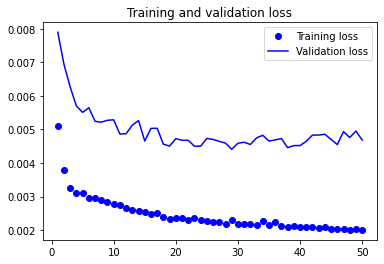

In [ ]:
loss_1 = lstm_1.history['loss']
val_loss_1 = lstm_1.history['val_loss']
epochs = range(1, len(loss_1) + 1)
plt.figure()
plt.plot(epochs, loss_1, 'bo', label='Training loss')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
Y_pred_1 = model_lstm_1.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error

mae_1 = mean_absolute_error(Y_test,Y_pred_1)
mse_1 = mean_squared_error(Y_test, Y_pred_1)
rmse_1 = np.sqrt(mse_1)

print('mean absolute error: ', mae_1)
print('root mean squared error: ', rmse_1)


72/72 [==============================] - 0s 2ms/step
mean absolute error:  0.041393223356484245
root mean squared error:  0.055908028746021875


We want to compare the results obtained with gthe actual time series in its original scale, so we need to rescale back the time series. \\
First, we need to reconstruct the shape of the original dataset. Then we need to rearange the column in order to have the same order of the original dataset: the CO column (the target) must be the first column. \\
This operation must be done both for train and test dataset.

In [ ]:
#Scaling back to the original scale

df_test_truncated = df.iloc[train_size+lookback:,1:]
#print(df_truncated.shape)
#print('Y_pred',Y_pred.shape)

df_test_with_Y_predicted_1 = np.concatenate((df_test_truncated.iloc[:,:],Y_pred_1), axis =1)
df_test_with_Y_predicted_1 = pd.DataFrame(df_test_with_Y_predicted_1)

print(df_test_with_Y_predicted_1)
print('concat y_pred',Y_pred_1.shape)

df_test_with_Y_tested = np.concatenate((df_test_truncated.iloc[:,:], Y_test), axis = 1)
df_test_with_Y_tested = pd.DataFrame(df_test_with_Y_tested)

print('concat Y_test', Y_test.shape)
print(df_test_with_Y_predicted_1.shape)

# Now I have to order the columns as in the original dataset

cols = df_test_with_Y_predicted_1.columns.tolist()
cols = cols[-1:] + cols[:-1]

df_test_with_Y_predicted_1 = df_test_with_Y_predicted_1[cols]
df_test_with_Y_tested = df_test_with_Y_tested[cols]

# Now we can apply the inverse_transform

Y_predicted_1 = scaler.inverse_transform(df_test_with_Y_predicted_1)
Y_tested = scaler.inverse_transform(df_test_with_Y_tested)
Y_predicted_1 = Y_predicted_1[:,0:1]
Y_tested = Y_tested[:,0:1]
print('Y_tested', Y_tested.shape)
print('Y_predicted', Y_predicted_1.shape)

            0         1         2         3         4         5         6   \
0     0.107002  0.021310  0.088352  0.165796  0.375940  0.328918  0.135679   
1     0.092998  0.012485  0.060085  0.165796  0.391931  0.328918  0.124326   
2     0.099102  0.014294  0.066366  0.165796  0.382717  0.328918  0.124775   
3     0.084919  0.009137  0.047522  0.165796  0.421370  0.328918  0.116232   
4     0.115081  0.019288  0.082343  0.165796  0.389918  0.328918  0.135904   
...        ...       ...       ...       ...       ...       ...       ...   
2287  0.478995  0.210411  0.392189  0.318009  0.091708  0.556115  0.370166   
2288  0.370018  0.176218  0.351632  0.237847  0.119348  0.524726  0.320369   
2289  0.355296  0.192248  0.371023  0.197021  0.119136  0.511401  0.310139   
2290  0.255117  0.147787  0.315308  0.157414  0.160754  0.455138  0.220324   
2291  0.304129  0.185290  0.362693  0.178199  0.140633  0.490672  0.259667   

            7         8         9         10        11  
0     

In [ ]:
str(test_data)


'7065   2004-12-30\n7066   2004-12-30\n7067   2004-12-30\n7068   2004-12-30\n7069   2004-12-30\n          ...    \n9352   2005-04-04\n9353   2005-04-04\n9354   2005-04-04\n9355   2005-04-04\n9356   2005-04-04\nName: Date, Length: 2292, dtype: datetime64[ns]'

In [ ]:
# METRICS for rescaled dataset
mae_1_re = mean_absolute_error(Y_test,Y_predicted_1)
mse_1_re = mean_squared_error(Y_test, Y_predicted_1)

rmse_1_re = np.sqrt(mse_1_re)

print('mean absolute error: ', mae_1_re)
print('root mean squared error: ', rmse_1_re)

mean absolute error:  2.0170020932198063
root mean squared error:  2.2419971714517604


In [ ]:
# For having an interactive plot in which we can zoom in, we need to build another dataset

plot_y_1 = [element[0] for element in Y_predicted_1] 
plot_ds_1 = np.zeros((len(plot_y_1),3))

plot_ds_1[:,1] = plot_y_1
plot_ds_1[:,0] = list(range(len(plot_y_1)))
plot_ds_1[:,2] = Y_tested[:,0]

plot_ds_1 = pd.DataFrame(plot_ds_1, columns = ['x', 'y_pred', 'y_true'])

#Now we can build the interactive plot
import plotly.express as px

fig = px.line(plot_ds_1, x='x', y=["y_pred", 'y_true'])
fig.update_layout(title='Prediction for LSTM 1')
fig.show()


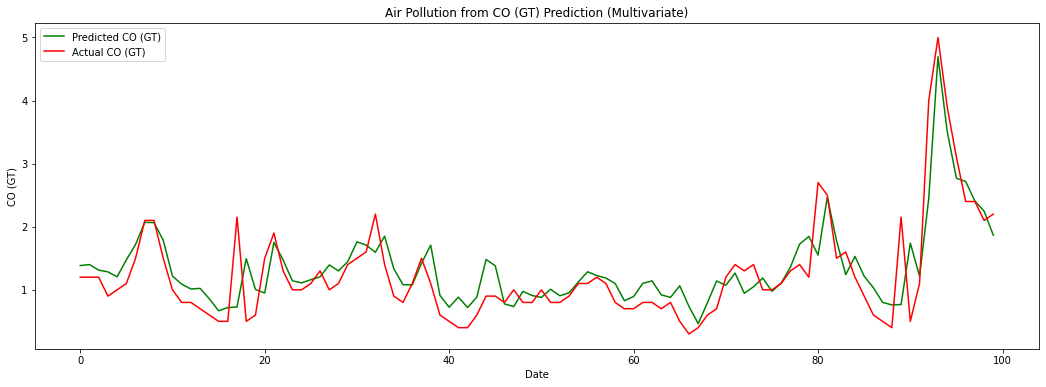

In [ ]:
#Plot a window of size 100 of the graph between actual vs predicted values
plt.figure(figsize=(18,6))  
plt.plot(Y_predicted_1[-100:,:], color= 'green',label = 'Predicted CO (GT)')
plt.plot(Y_tested[-100:,:], color = 'red',label = 'Actual CO (GT)')
plt.title("Air Pollution from CO (GT) Prediction (Multivariate)")
plt.xlabel("Date")
plt.ylabel("CO (GT)")
plt.legend()
plt.show()


#### **LSTM with DROPOUT**

In [ ]:
# Build the model
model_lstm_dropout_1 = Sequential()

model_lstm_dropout_1.add(LSTM(units = 32, return_sequences = False, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm_dropout_1.add(Dropout(0.2))
model_lstm_dropout_1.add(Dense(units = 1))

model_lstm_dropout_1.compile(optimizer = 'adam', loss = 'mean_squared_error')

#Train the model
lstm_dropout_1 = model_lstm_dropout_1.fit(X_train, Y_train, epochs = 50, batch_size = 30, validation_split = 0.2)
lstm_dropout_1
model_lstm_dropout_1.save('air_pollution_lstm_dropout_1.h5')

Epoch 1/50
188/188 [==============================] - 3s 8ms/step - loss: 0.0082 - val_loss: 0.0101
Epoch 2/50
188/188 [==============================] - 1s 6ms/step - loss: 0.0051 - val_loss: 0.0074
Epoch 3/50
188/188 [==============================] - 2s 8ms/step - loss: 0.0043 - val_loss: 0.0070
Epoch 4/50
188/188 [==============================] - 1s 8ms/step - loss: 0.0038 - val_loss: 0.0058
Epoch 5/50
188/188 [==============================] - 1s 6ms/step - loss: 0.0035 - val_loss: 0.0056
Epoch 6/50
188/188 [==============================] - 1s 6ms/step - loss: 0.0034 - val_loss: 0.0054
Epoch 7/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0033 - val_loss: 0.0053
Epoch 8/50
188/188 [==============================] - 1s 6ms/step - loss: 0.0033 - val_loss: 0.0052
Epoch 9/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0032 - val_loss: 0.0053
Epoch 10/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0031 - val_loss: 0.0052

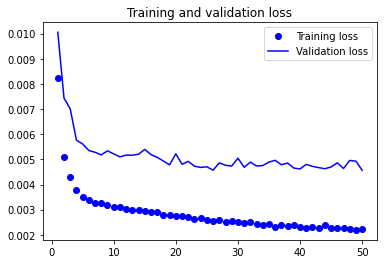

In [ ]:
loss_drop = lstm_dropout_1.history['loss']
val_loss_drop = lstm_dropout_1.history['val_loss']
epochs = range(1, len(loss_drop) + 1)
plt.figure()
plt.plot(epochs, loss_drop, 'bo', label='Training loss')
plt.plot(epochs, val_loss_drop, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
Y_pred_drop = model_lstm_1.predict(X_test)

mae_drop = mean_absolute_error(Y_test,Y_pred_drop)
mse_drop = mean_squared_error(Y_test, Y_pred_drop)

rmse_drop = np.sqrt(mse_drop)

print('mean absolute error: ', mae_drop)
print('root mean squared error: ', rmse_drop)

72/72 [==============================] - 0s 2ms/step
mean absolute error:  0.044847048005772515
root mean squared error:  0.05993112251397726


If we want to see the forecasting plot and compare the predicted values with the actual ones we have to do the inverse scaling.

In [ ]:
#Scaling back to the original scale

df_test_with_Y_predicted_drop = np.concatenate((df_test_truncated.iloc[:,:],Y_pred_drop), axis =1)
df_test_with_Y_predicted_drop = pd.DataFrame(df_test_with_Y_predicted_drop)
print(df_test_with_Y_predicted_drop)
print('concat y_pred',Y_pred_drop.shape)

            0         1         2         3         4         5         6   \
0     0.107002  0.021310  0.088352  0.165796  0.375940  0.328918  0.135679   
1     0.092998  0.012485  0.060085  0.165796  0.391931  0.328918  0.124326   
2     0.099102  0.014294  0.066366  0.165796  0.382717  0.328918  0.124775   
3     0.084919  0.009137  0.047522  0.165796  0.421370  0.328918  0.116232   
4     0.115081  0.019288  0.082343  0.165796  0.389918  0.328918  0.135904   
...        ...       ...       ...       ...       ...       ...       ...   
2287  0.478995  0.210411  0.392189  0.318009  0.091708  0.556115  0.370166   
2288  0.370018  0.176218  0.351632  0.237847  0.119348  0.524726  0.320369   
2289  0.355296  0.192248  0.371023  0.197021  0.119136  0.511401  0.310139   
2290  0.255117  0.147787  0.315308  0.157414  0.160754  0.455138  0.220324   
2291  0.304129  0.185290  0.362693  0.178199  0.140633  0.490672  0.259667   

            7         8         9         10        11  
0     

I have to reorder the columns otherwise we can't apply the inverse-scaling with scikitlearn.

In [ ]:
df_test_with_Y_predicted_drop = df_test_with_Y_predicted_drop[cols]

In [ ]:
Y_predicted_drop = scaler.inverse_transform(df_test_with_Y_predicted_drop)
Y_predicted_drop = Y_predicted_drop[:,0:1]
print('Y_tested', Y_tested.shape)
print('Y_predicted', Y_predicted_drop.shape)

Y_tested (2292, 1)
Y_predicted (2292, 1)


In [ ]:
# METRICS with rescaled dataset

mae_drop_re = mean_absolute_error(Y_test,Y_predicted_drop)
mse_drop_re = mean_squared_error(Y_test, Y_predicted_drop)

rmse_drop_re = np.sqrt(mse_drop_re)

print('mean absolute error: ', mae_drop_re)
print('root mean squared error: ', rmse_drop_re)

mean absolute error:  2.128615035237523
root mean squared error:  2.3878780233394035


In [ ]:
# For having an interactive plot in which we can zoom in, we need to build another dataset

plot_ds_drop = np.zeros((len(Y_predicted_drop[:,0]),3))

plot_ds_drop[:,1] = Y_predicted_drop[:,0]
plot_ds_drop[:,0] = list(range(len(Y_predicted_drop[:,0])))
plot_ds_drop[:,2] = Y_tested[:,0]

plot_ds_drop = pd.DataFrame(plot_ds_drop, columns = ['x', 'y_pred', 'y_true'])

#Now we can build the interactive plot
import plotly.express as px

fig = px.line(plot_ds_drop, x='x', y=["y_pred", 'y_true'])
fig.update_layout(title='Prediction for LSTM DROP')
fig.show()

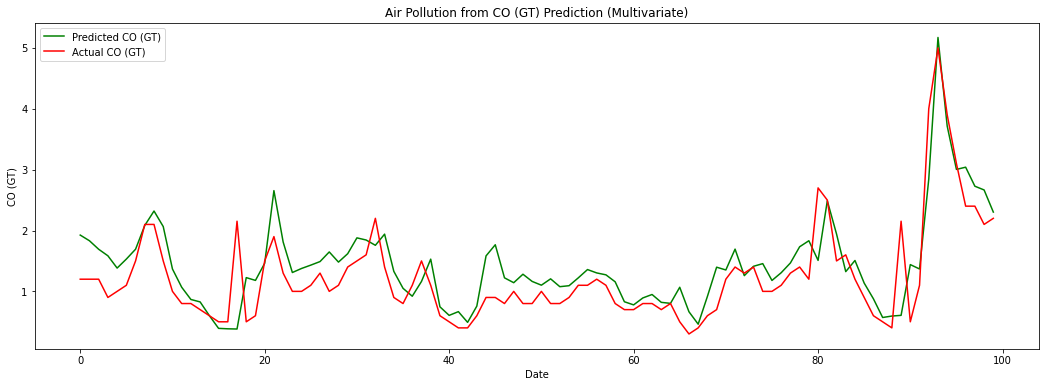

In [ ]:
#Plot a window of sie 100 of the graph between actual vs predicted values
plt.figure(figsize=(18,6))  
plt.plot(Y_predicted_drop[-100:,:], color= 'green',label = 'Predicted CO (GT)')
plt.plot(Y_tested[-100:,:] , color = 'red',label = 'Actual CO (GT)')
plt.title("Air Pollution from CO (GT) Prediction (Multivariate)")
plt.xlabel("Date")
plt.ylabel("CO (GT)")
plt.legend()
plt.show()


#### **BIDIRECTIONAL LSTM**

In [ ]:
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.datasets import imdb


In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam') 

In [ ]:
history=model.fit(X_train, Y_train,
          batch_size=30,
          epochs=50,
          validation_split=0.2)
print(history.history['loss'])

Epoch 1/50
188/188 [==============================] - 5s 12ms/step - loss: 0.0118 - val_loss: 0.0167
Epoch 2/50
188/188 [==============================] - 2s 9ms/step - loss: 0.0062 - val_loss: 0.0104
Epoch 3/50
188/188 [==============================] - 2s 8ms/step - loss: 0.0050 - val_loss: 0.0090
Epoch 4/50
188/188 [==============================] - 2s 8ms/step - loss: 0.0046 - val_loss: 0.0081
Epoch 5/50
188/188 [==============================] - 2s 8ms/step - loss: 0.0042 - val_loss: 0.0076
Epoch 6/50
188/188 [==============================] - 2s 8ms/step - loss: 0.0039 - val_loss: 0.0071
Epoch 7/50
188/188 [==============================] - 2s 8ms/step - loss: 0.0037 - val_loss: 0.0067
Epoch 8/50
188/188 [==============================] - 2s 8ms/step - loss: 0.0036 - val_loss: 0.0066
Epoch 9/50
188/188 [==============================] - 2s 8ms/step - loss: 0.0035 - val_loss: 0.0060
Epoch 10/50
188/188 [==============================] - 2s 8ms/step - loss: 0.0034 - val_loss: 0.006

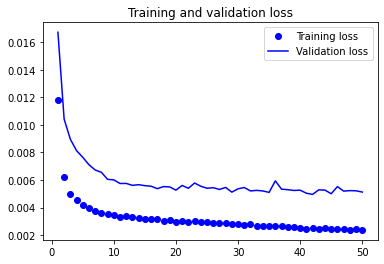

In [ ]:
loss_b = history.history['loss']
val_loss_b = history.history['val_loss']
epochs = range(1, len(loss_b) + 1)
plt.figure()
plt.plot(epochs, loss_b, 'bo', label='Training loss')
plt.plot(epochs, val_loss_b, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
Y_pred_b = model.predict(X_test)

mae_b = mean_absolute_error(Y_test,Y_pred_b)
mse_b = mean_squared_error(Y_test, Y_pred_b)

rmse_b = np.sqrt(mse_b)

print('mean absolute error: ', mae_b)
print('root mean squared error: ', rmse_b)

72/72 [==============================] - 1s 4ms/step
mean absolute error:  0.048671306332648455
root mean squared error:  0.06263438969305572


In [ ]:
#Scaling back to the original scale

df_test_with_Y_predicted_b = np.concatenate((df_test_truncated.iloc[:,:],Y_pred_b), axis =1)
df_test_with_Y_predicted_b = pd.DataFrame(df_test_with_Y_predicted_b)
print(df_test_with_Y_predicted_b)
print('concat y_pred',Y_pred_b.shape)



            0         1         2         3         4         5         6   \
0     0.107002  0.021310  0.088352  0.165796  0.375940  0.328918  0.135679   
1     0.092998  0.012485  0.060085  0.165796  0.391931  0.328918  0.124326   
2     0.099102  0.014294  0.066366  0.165796  0.382717  0.328918  0.124775   
3     0.084919  0.009137  0.047522  0.165796  0.421370  0.328918  0.116232   
4     0.115081  0.019288  0.082343  0.165796  0.389918  0.328918  0.135904   
...        ...       ...       ...       ...       ...       ...       ...   
2287  0.478995  0.210411  0.392189  0.318009  0.091708  0.556115  0.370166   
2288  0.370018  0.176218  0.351632  0.237847  0.119348  0.524726  0.320369   
2289  0.355296  0.192248  0.371023  0.197021  0.119136  0.511401  0.310139   
2290  0.255117  0.147787  0.315308  0.157414  0.160754  0.455138  0.220324   
2291  0.304129  0.185290  0.362693  0.178199  0.140633  0.490672  0.259667   

            7         8         9         10        11  
0     

In [ ]:
# I muat reorder the column for applying the inverse scaler

#cols = df_test_with_Y_predicted_b.columns.tolist()
#cols = cols[-1:] + cols[:-1]
df_test_with_Y_predicted_b = df_test_with_Y_predicted_b[cols]

# df_test_with_Y_tested = df_test_with_Y_tested[cols]

In [ ]:
Y_predicted_b = scaler.inverse_transform(df_test_with_Y_predicted_b)
# Y_tested = scaler.inverse_transform(df_test_with_Y_tested)
Y_predicted_b = Y_predicted_b[:,0:1]
# Y_tested = Y_tested[:,0:1]
print('Y_tested', Y_tested.shape)
print('Y_predicted_b', Y_predicted_b.shape)

Y_tested (2292, 1)
Y_predicted_b (2292, 1)


In [ ]:
# METRICS for the rescaled dataset

mae_b_re = mean_absolute_error(Y_test,Y_predicted_b)
mse_b_re = mean_squared_error(Y_test, Y_predicted_b)

rmse_b_re = np.sqrt(mse_b_re)

print('mean absolute error: ', mae_b_re)
print('root mean squared error: ', rmse_b_re)

mean absolute error:  2.1759258349976744
root mean squared error:  2.3887430829838463


In [ ]:
# For having an interactive plot in which we can zoom in, we need to build another dataset

plot_ds_b = np.zeros((len(Y_predicted_b[:,0]),3))

plot_ds_b[:,1] = Y_predicted_drop[:,0]
plot_ds_b[:,0] = list(range(len(Y_predicted_b[:,0])))
plot_ds_b[:,2] = Y_tested[:,0]

plot_ds_b = pd.DataFrame(plot_ds_b, columns = ['x', 'y_pred', 'y_true'])

#Now we can build the interactive plot

fig = px.line(plot_ds_b, x='x', y=["y_pred", 'y_true'])
fig.update_layout(title='Prediction for BI-LSTM')

fig.show()

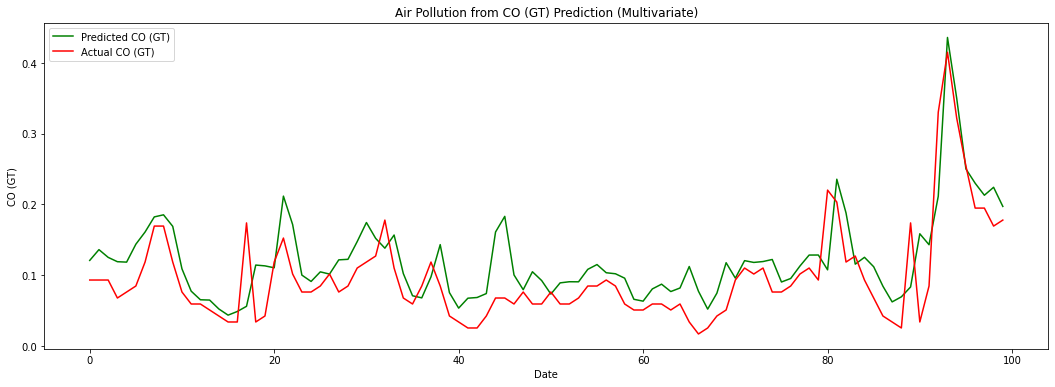

In [ ]:
#Plot a window of size 100 of the graph between actual vs predicted values
plt.figure(figsize=(18,6))  
plt.plot(Y_pred_b[-100:,:], color= 'green',label = 'Predicted CO (GT)')
plt.plot(Y_test[-100:,:] , color = 'red',label = 'Actual CO (GT)')
plt.title("Air Pollution from CO (GT) Prediction (Multivariate)")
plt.xlabel("Date")
plt.ylabel("CO (GT)")
plt.legend()
plt.show()


#### **FINAL RESULTS**

In [ ]:
plot_ds_b = np.zeros((len(Y_predicted_b[:,0]),5))

plot_ds_b[:,0] = list(range(len(Y_predicted_b[:,0])))

plot_ds_b[:,1] = Y_predicted_1[:,0]
plot_ds_b[:,2] = Y_predicted_drop[:,0]
plot_ds_b[:,3] = Y_predicted_b[:,0]

plot_ds_b[:,4] = Y_tested[:,0]

plot_ds_b = pd.DataFrame(plot_ds_b, columns = ['x', 'y_pred_1', 'y_pred_drop', 'y_pred_b', 'y_true'])

#Now we can build the interactive plot

fig = px.line(plot_ds_b, x='x', y=["y_pred_1", 'y_pred_drop','y_pred_b', 'y_true'])
fig.update_layout(title='CO(GT) prediction for the three model')

fig.show()

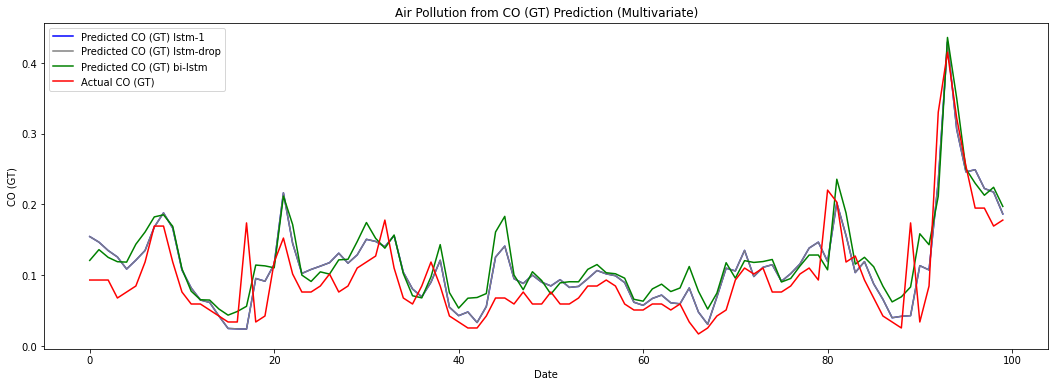

In [ ]:
# Let's compare the results on a smaller window

plt.figure(figsize=(18,6))  
plt.plot(Y_pred_1[-100:,:], color= 'blue',label = 'Predicted CO (GT) lstm-1')
plt.plot(Y_pred_drop[-100:,:], color= 'gray',label = 'Predicted CO (GT) lstm-drop')
plt.plot(Y_pred_b[-100:,:], color= 'green',label = 'Predicted CO (GT) bi-lstm')
plt.plot(Y_test[-100:,:] , color = 'red',label = 'Actual CO (GT)')

plt.title("Air Pollution from CO (GT) Prediction (Multivariate)")
plt.xlabel("Date")
plt.ylabel("CO (GT)")
plt.legend()
plt.show()
#plt.savefig('graph.png')


Finally, let's plot the reisduals.

In [ ]:
#Build a single dataframe with all the residual for using the plotly library.
import itertools

residuals = list(itertools.chain(Y_pred_1-Y_test,Y_pred_drop-Y_test,Y_pred_b-Y_test))

index = ['LSTM_1']*len(Y_pred_1) + ['LSTM_drop']*len(Y_pred_drop) + ['LSTM_b']*len(Y_pred_b)

x = 3*list(range(0,len(Y_pred_1)))

new_df  = []

for i, el, ind in zip(x, residuals, index):
  new_df.append([i, el[0],ind])
df_res = pd.DataFrame(new_df, columns = ['x','Residuals','label']) 

df_res


x  Residuals   label
0        0  -0.003672  LSTM_1
1        1  -0.003108  LSTM_1
2        2  -0.005660  LSTM_1
3        3  -0.005978  LSTM_1
4        4  -0.006694  LSTM_1
...    ...        ...     ...
6871  2287  -0.003976  LSTM_b
6872  2288   0.035165  LSTM_b
6873  2289   0.018166  LSTM_b
6874  2290   0.054828  LSTM_b
6875  2291   0.019308  LSTM_b

[6876 rows x 3 columns]

In [ ]:
import plotly.express as px

fig = px.scatter(df_res, x='x', y = 'Residuals', color = 'label')
fig.update_layout(title='Residuals for the three models')
fig.show()

#0 is lstm_1, 1 is lstm_frop, 2 is lstm_bi

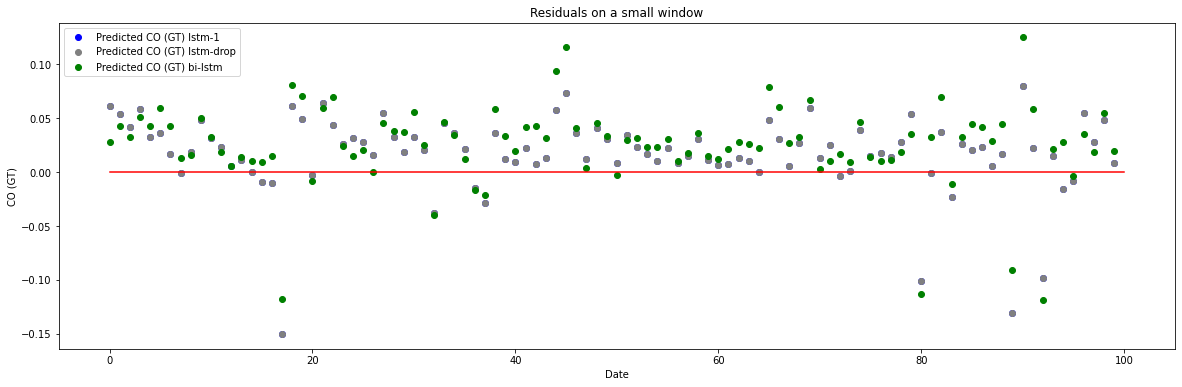

In [ ]:
#Finally, let's plot the residuals
plt.figure(figsize=(20,6)) 

plt.scatter(range(0,100),Y_pred_1[-100:]-Y_test[-100:], color= 'blue',label = 'Predicted CO (GT) lstm-1')
plt.scatter(range(0,100),Y_pred_drop[-100:]-Y_test[-100:], color= 'gray',label = 'Predicted CO (GT) lstm-drop')
plt.scatter(range(0,100),Y_pred_b[-100:]-Y_test[-100:], color= 'green',label = 'Predicted CO (GT) bi-lstm')
plt.plot([0,100],[0,0], color = 'red') #let's plot the reference line 0

plt.title("Residuals on a small window")
plt.xlabel("Date")
plt.ylabel("CO (GT)")
plt.legend()
plt.show()

In [ ]:
# For completeness we plot also the errors for the scaled dataset.
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['','LSTM 1', 'LSTM DROP', 'BI LSTM'], line_color='darkslategray', fill_color='lightskyblue'),
                 cells=dict(values=[['MAE', 'RMSE'],[mae_1, rmse_1], [mae_drop,rmse_drop],[mae_b, rmse_b]], line_color='darkslategray')) ])

fig.update_layout(title='Metrics for scaled dataset')

fig.show()

In [ ]:
# Finally, we visualize the matrix containing the rmse and mae for each model for the rescaled dataset.


fig = go.Figure(data=[go.Table(header=dict(values=['','LSTM 1', 'LSTM DROP', 'BI LSTM'], line_color='darkslategray',
                fill_color='lightskyblue',),
                 cells=dict(values=[['MAE', 'RMSE'],[mae_1_re, rmse_1_re], [mae_drop_re,rmse_drop_re],[mae_b_re, rmse_b_re]], line_color='darkslategray'))])

fig.update_layout(title='Metrics for RESCALED dataset')

fig.show()

By the previous plots we can observe that the results of all the three methods are very good. All the three types of LSTM were able to capture the general trend of the time series. We have made several run of the following code during our analysis and we had noticed that in most cases the prediction of the LSTM_1 and LSTM with drop out were exactly the same, as can be seen by the outputs of this notebook (look at the plot but also at the metrics: RMSE and MAE). \\
Whereas, Bidirectional LSTM (that we thoguht could capture the trend more accurately) performed as good as the other two models (in some runs slighlty better, in some other runs slightly worst). 
Our hypotesis is that the dataset used contains few observation (about 9000), so Bidirectional LSTM were not necessary to capture the trend and so the improvement given by this powerful technique, in this case is useless.